# Homework 2

Welcome to your second homework notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colormaps

import pandas as pd
import seaborn as sns
import scipy as sp

sns.set_style('white')
sns.set_palette(palette='deep', color_codes=True)

mpl.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.figsize'] = [15, 10]

# for creating animations
import matplotlib.animation
from IPython.display import HTML

---

# Problem 0

Read section chapters 3.1 - 3.3 from Learning from Data. 

**Again** - In the interest of time, read to reinforce what we discussed in class. That is, if we didn't discuss it in class, skip it in the book! 

Right down some **non trivial** questions/comments below. Try and implement some of what you read. Experiment here, and show me you're engaging with the reading in a meaningful way.

- The reading discusses three main linear models: linear classification, linear regression, and logistic regression. It would be interesting to explore in more depth the relationships between these models. For example, the reading mentions that logistic regression and linear regression can both be used for linear classification. Are there other ways that insights from one model could be applied to the others?

- For linear regression, the reading derives the closed-form pseudo-inverse solution for finding the optimal weights. This is an elegant result. However, for logistic regression, we have to resort to an iterative optimization technique like gradient descent. I'm curious if there are any insights that would allow deriving a closed-form solution for logistic regression as well. 

- Stochastic gradient descent is presented as an efficient alternative to batch gradient descent. It would be useful to better understand the tradeoffs between these two algorithms. For example, how does the convergence rate compare, and how does the choice of batch size in SGD affect the performance?

- The reading focuses on the case of linear models. An important next step is handling nonlinearity, which is discussed briefly at the end. It would be interesting to learn more about techniques like kernel methods that can extend linear models to capture nonlinear patterns. 

---

# Problem 1 Gradient Descent

In this problem we're going to implement a basic version of gradient descent.

## 1.A - Simple Function
In this problem, lets first look at: 

$$f(x)= x^3 - 2x^2 + 2$$

In [12]:
x = np.linspace(-1,2.5)
f = lambda x: x**3 - 2*x**2 + 2

(0.0, 3.0)

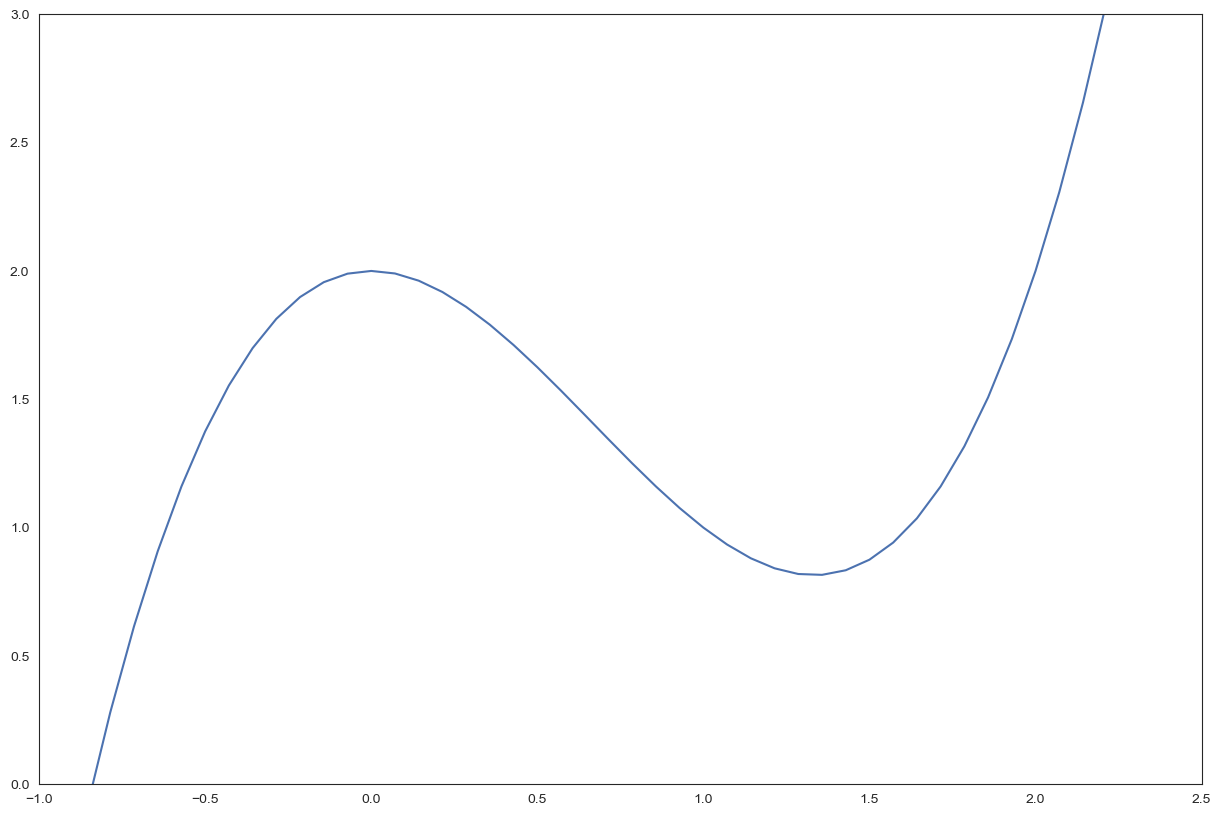

In [13]:
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])

From this, we can see that our **local** minimum will be somwehre around $x=1.4$, but this is unknown to the optimizer! Lets try to optimize it using the basic **gradient descent** algorithm we discussed in class.

Recall the weight update equation:

$$\boldsymbol{w}(t+1) = \boldsymbol{w}(t) + \eta \hat{\boldsymbol{v}}$$

where $\hat{\boldsymbol{v}}$ is the **unit-vector** in the direction we want to step.

Gradient Descent is then just a step in the **direction** of the **negative gradient**:

$$\boldsymbol{w}(t+1) = \boldsymbol{w}(t) -\eta\cdot\nabla f(\boldsymbol{w}(t))$$

Below, lets implement the gradient descent step algorithm for this minimize this simple function. 

Before we move on, lets define a function to evaluate the gradient directly:

In [14]:
f_prime = lambda x: 3*x**2-4*x

Now we're ready!

Because we are doing this numerically, we need to define a **stopping criteria**. That is, we need to be able to stop our algorithm! 

One way to do this, is to just take up to some **maximum number of iterations** of GD. 

Another way, is to define a **delta** quantity as the difference between our last step and the current step, and stop when that number is small enough. In other words, if our steps are small enough, we can call that done!

In [15]:
# Set hyperparameter
max_iter = 40 # Max iteration times
eta = 0.05 # Learning rate
delta = 0.001

# randomize initial guess/weight
initialGuess = np.random.rand()


# setup path holding variables as lists
wPath = [initialGuess]
fPath = [f(initialGuess)]

w_t = initialGuess

curr_iter = 1

while True:

    if curr_iter >= max_iter:
        break
    
    w_t_new = w_t - eta*f_prime(w_t)
    
    if abs(w_t-w_t_new)<delta:
        break
    
    # store weights
    wPath.append(w_t_new)
    fPath.append(f(w_t_new))
    
    w_t = w_t_new
    curr_iter += 1

# convert back from list to array
wPath = np.asarray(wPath)
fPath = np.asarray(fPath)

# print start and end points
endPoint = np.round((wPath[-1]),2)

print("Staring at:{}, GD ended at:{} with {} steps".format(initialGuess, endPoint,fPath.shape[0]))

Staring at:0.6451362060893608, GD ended at:1.33 with 28 steps


### Visualization

#### Lets plot it!

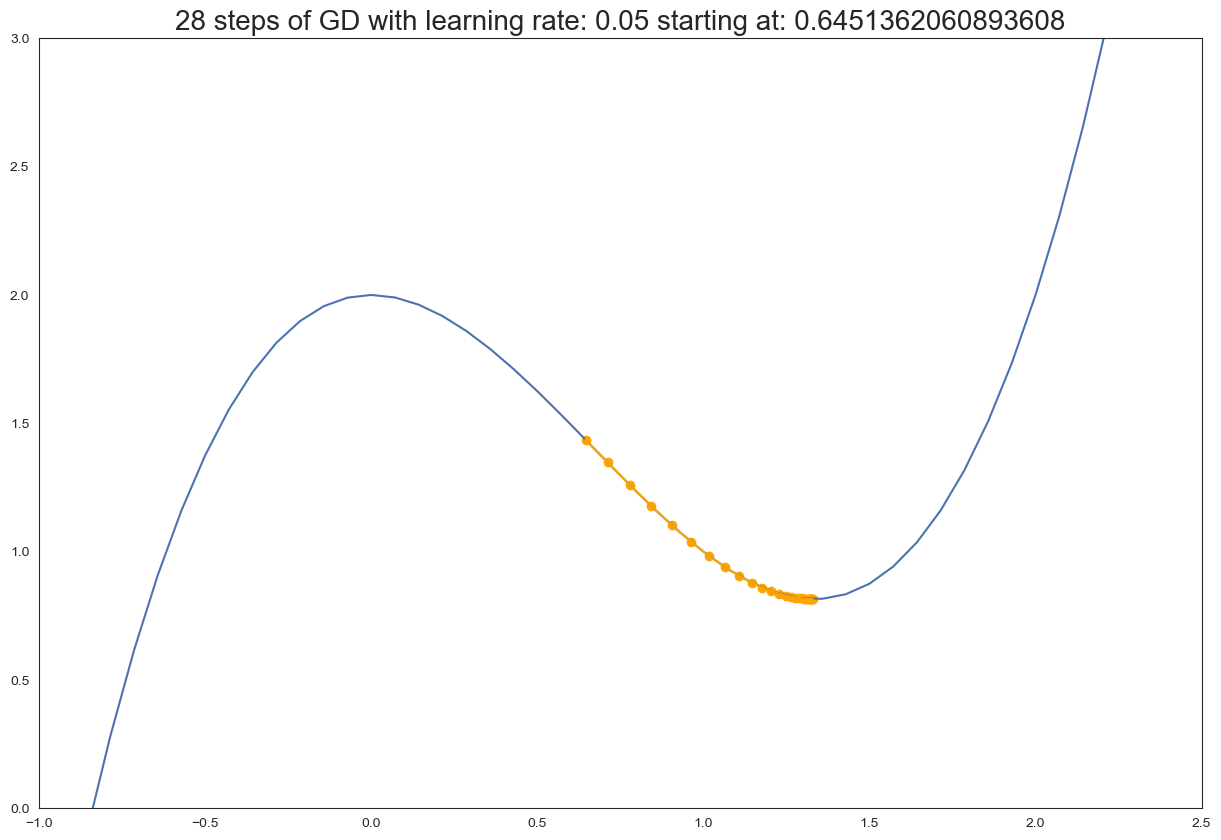

In [16]:
plt.xlim([-1,2.5]);
plt.ylim([0,3]);
plt.title(r"{} steps of GD with learning rate: {} starting at: {}".format(fPath.shape[0],eta,initialGuess), fontsize=20)

plt.plot(x,f(x));
plt.plot(wPath,fPath,color='orange');
plt.scatter(wPath,fPath,color='orange');

#### GIF It!
It might be useful to visualize a gif of this process! 

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.xlim([-1,2.5]);
plt.ylim([0,3]);
plt.title("{} steps of GD with learning rate: {} starting at: {}"\
          .format(fPath.shape[0],eta,initialGuess), fontsize=20)

ax.plot(x,f(x));


l, = ax.plot([],[],color="orange") # [] serve as placeholders for data
scat = ax.scatter([],[],color="orange")

def animate(i):
    l.set_data(wPath[:i], fPath[:i]);
    data = np.hstack((wPath[:i,np.newaxis], fPath[:i, np.newaxis]))
    scat.set_offsets(data)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(fPath), interval=500);
plt.close()
HTML(ani.to_html5_video())

## Run your own experiments

Run a couple experiments of your own using your code from above (copy/paste it below), and **report your results**

Change the `initialGuess` and `eta`  above a few times and report your results by editing this cell and placing your values in the table below:


|Initial Guess|Eta|End Point|
|-------------|---|---------|
|1|0.001|1|
|1|0.01|1.25|
|1|0.05|1.33|
|4|0.001|3.07|
|4|0.01|1.52|
|4|0.05|1.34|
|10|0.001|5|
|10|0.01|1.57|
|10|0.05|infinity|

What do you notice? Comment below


In [28]:
max_iter = 40
delta = 0.001

for initial_guess in [-1, 0, 1, 4, 10]:
    for eta in [0.001, 0.01, 0.05]:

        w_t = initial_guess
        w_t_new = 0
        current_iter = 0
        
        try:
            while True:
                if current_iter > max_iter:
                    break
                
                w_t_new = w_t - eta * f_prime(w_t)
                
                if abs(w_t - w_t_new) < delta:
                    break

                w_t = w_t_new
                current_iter += 1  # increment the current iteration

            end_point = np.round((w_t), 2)
            print(f"Starting at: {initial_guess} and learning rate {eta}, GD ended at: {end_point} with {current_iter} steps")

        except OverflowError:
            print(f"Overflow occurred for initial guess {initial_guess} and learning rate {eta}.")


Starting at: -1 and learning rate 0.001, GD ended at: -1.36 with 41 steps
Overflow occurred for initial guess -1 and learning rate 0.01.
Overflow occurred for initial guess -1 and learning rate 0.05.
Starting at: 0 and learning rate 0.001, GD ended at: 0 with 0 steps
Starting at: 0 and learning rate 0.01, GD ended at: 0 with 0 steps
Starting at: 0 and learning rate 0.05, GD ended at: 0 with 0 steps
Starting at: 1 and learning rate 0.001, GD ended at: 1 with 0 steps
Starting at: 1 and learning rate 0.01, GD ended at: 1.25 with 41 steps
Starting at: 1 and learning rate 0.05, GD ended at: 1.33 with 21 steps
Starting at: 4 and learning rate 0.001, GD ended at: 3.07 with 41 steps
Starting at: 4 and learning rate 0.01, GD ended at: 1.52 with 41 steps
Starting at: 4 and learning rate 0.05, GD ended at: 1.34 with 22 steps
Starting at: 10 and learning rate 0.001, GD ended at: 5.0 with 41 steps
Starting at: 10 and learning rate 0.01, GD ended at: 1.57 with 41 steps
Overflow occurred for initial 

**Answer:** I notice that some of the combinations of starting point and learning rate cause overflow which means the number is too large. So, a bad starting point and learning rate may lead to failure of finding the minimum, even just the local minimum.

[  10.           -3.           -4.95         -9.615375    -25.40676546
 -127.31367821] [ 8.02000000e+02 -4.30000000e+01 -1.68292375e+02 -1.07190456e+03
 -1.76891694e+04 -2.09601401e+06]
Staring at:10, GD ended at:-127.31 with 6 steps


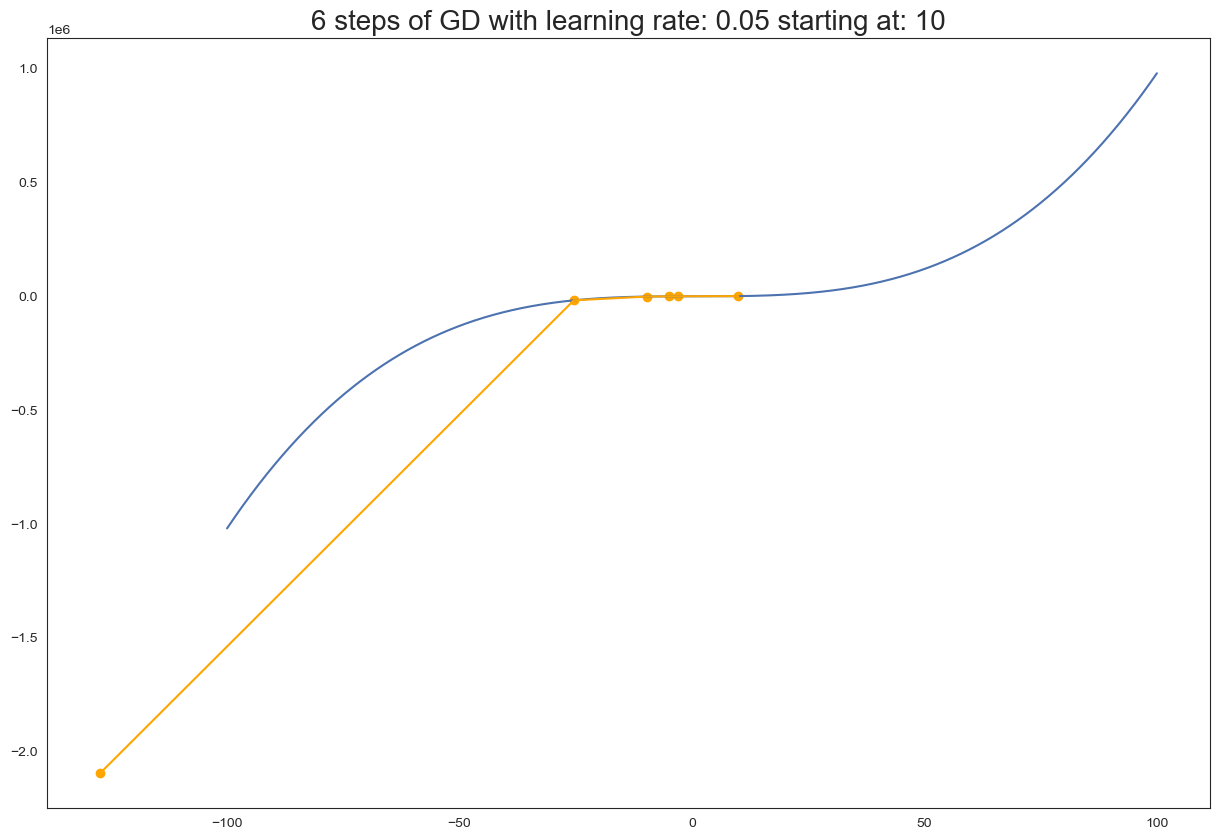

In [45]:
# Here I try to figure out what happened when initial guess is 10 and learning rate is 0.05.

max_iter = 6
initialGuess = 10
eta = 0.05
delta = 0.001

x = np.linspace(-100,100,10000)

# setup path holding variables as lists
wPath = [initialGuess]
fPath = [f(initialGuess)]

# randomize weights
w_t = initialGuess
w_t_new = 0

curr_iter =1

while curr_iter < max_iter:

    w_t_new = w_t - eta*f_prime(w_t)
    
    if abs(w_t-w_t_new)<delta:
        break
    
    # store weights
    wPath.append(w_t_new)
    fPath.append(f(w_t_new))
    
    w_t = w_t_new
    curr_iter +=1

# convert back from list to array
wPath = np.asarray(wPath)
fPath = np.asarray(fPath)

# print start and end points
endPoint = np.round((wPath[-1]),2)

print(wPath, fPath)
print("Staring at:{}, GD ended at:{} with {} steps".format(initialGuess, endPoint,fPath.shape[0]))

plt.title(r"{} steps of GD with learning rate: {} starting at: {}".format(fPath.shape[0],eta,initialGuess), fontsize=20)

plt.plot(x,f(x));
plt.plot(wPath,fPath,color='orange');
plt.scatter(wPath,fPath,color='orange');

**Answer:** from the figure above, it's clear that only 6 iterations have already move the point to -2e6. And the max iteration number I set before is 40. So the number is to large for python to handle, let alone find the local minimum.

## 1.B - Hilly Function

Now lets repeat the above analysis with a more "complicated" but still relatively "simple" function:

$$f(x,y) = x^2+2y^2 + 2\sin(2\pi x)\sin(2\pi y)$$

As always, lets first plot it:

In [24]:
X, Y = np.meshgrid(np.linspace(-1,1),np.linspace(-1,1))
f = lambda x,y: x**2 + 2*y**2 + 2*np.sin(2*np.pi*x)*np.sin(2*np.pi*y)

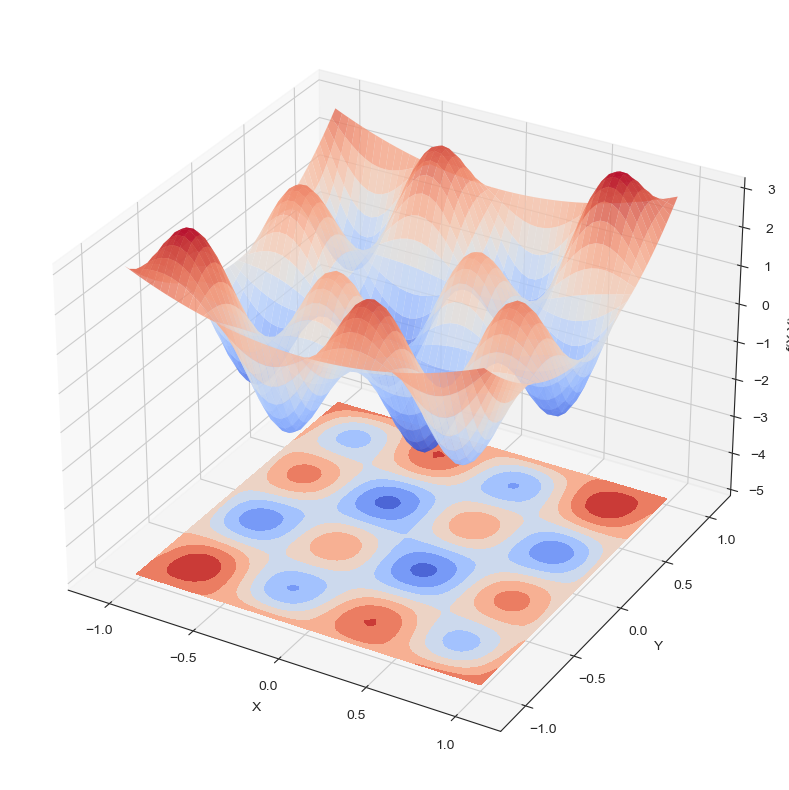

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_xlim(-1.2, 1.2)
ax.set_ylabel('Y')
ax.set_ylim(-1.2, 1.2)
ax.set_zlabel('f(X,Y)')
ax.set_zlim(-5, 3.1)


surface = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.8)
contour = ax.contourf(X, Y, f(X,Y), offset=-5, cmap=cm.coolwarm);

Wow! That sure is a "hilly" function. It clearly doesn't have just one minimum, but either way, lets start making some steps and see what we recover!

In [73]:
f_prime_x = lambda x, y: 2*x + 4*np.pi*np.cos(2*np.pi*x)*np.sin(2*np.pi*y)
f_prime_y = lambda x, y: 4*y + 4*np.pi*np.sin(2*np.pi*x)*np.cos(2*np.pi*y)

Below we check **both** delta and number of iterations, as our implementation is kind of erratic.

In [199]:
initialGuess = [1, -1]
eta = 0.03
delta = 0.001

max_iter = 30
curr_iter = 1

# set starting point
x_old = initialGuess[0]
y_old = initialGuess[1]

# setup path holding variables as lists
xPath = [initialGuess[0]]
yPath = [initialGuess[1]]
fPath = [f(x_old,y_old)]
x_new = 0
y_new = 0

# carry out gradient descent
while curr_iter < max_iter:
    
    # take a step in the negative gradient direction
    x_new = x_old - eta * f_prime_x(x_old,y_old)
    y_new = y_old - eta * f_prime_y(x_old,y_old)
    
    # calculuate delta
    curr_delta = np.linalg.norm(np.asarray((x_new,y_new)) - np.asarray((x_old,y_old)),2)
    if curr_delta < delta:
        break
    
    # store the function value for plotting
    f_new = f(x_new,y_new)
    xPath.append(x_new)
    yPath.append(y_new)
    fPath.append(f_new)
    
    # update x_old and y_old
    x_old = x_new
    y_old = y_new
    
    curr_iter += 1
    
# convert back from list to array
xPath = np.asarray(xPath)
yPath = np.asarray(yPath)
fPath = np.asarray(fPath)

# print start and end points
endPoint = (xPath[-1],yPath[-1])

print("Staring at:{}, GD ended at:{} with {} steps".format(initialGuess, endPoint,fPath.shape[0]))

Staring at:[1, -1], GD ended at:(0.867654304330324, -0.6710423516922889) with 30 steps


### Visualizations

#### Plot
Lets visualize this run. Here we can visualize the start and end points:

/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_47554/1643856548.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter3D([xPath[0],xPath[-1]],[yPath[0],yPath[-1]],[-5,-5],s=200, alpha=1, c=[0,1], cmap = cm.get_cmap('spring', 2))


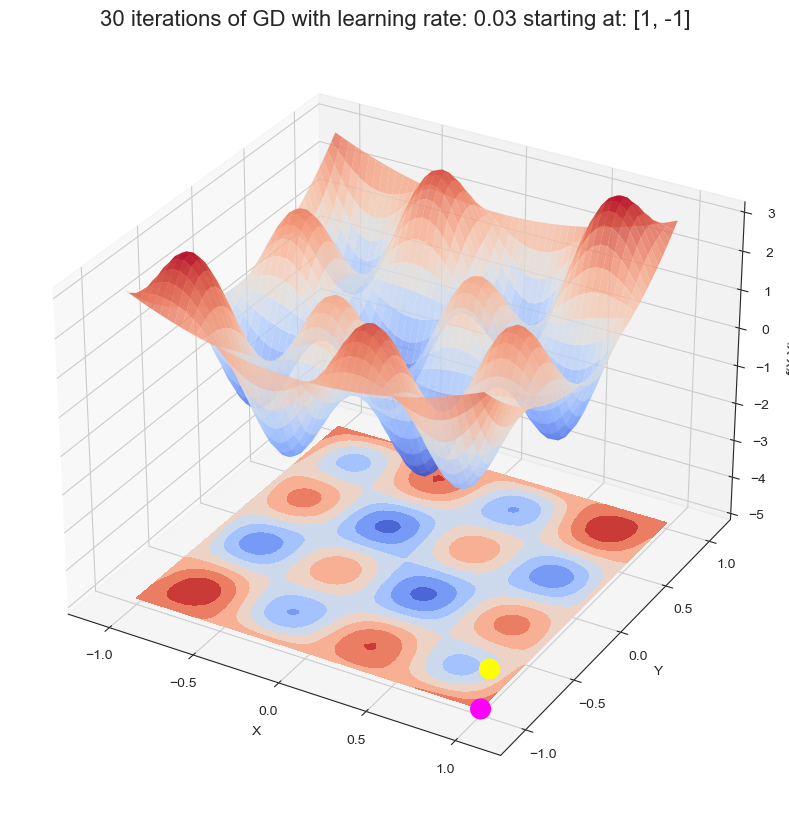

In [202]:
# setup plot
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');
ax.set_xlabel('X');
ax.set_xlim(-1.2, 1.2);
ax.set_ylabel('Y');
ax.set_ylim(-1.2, 1.2);
ax.set_zlabel('f(X,Y)');
ax.set_zlim(-5, 3.1);
plt.title(r"{} iterations of GD with learning rate: {} starting at: {}".format(xPath.shape[0],eta,initialGuess), fontsize=16)

# plot the surface and contour plot
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.8)
contour = ax.contourf(X, Y, f(X,Y), zdir='z', offset=-5, cmap=cm.coolwarm)

# scatter our gradient descent steps
ax.scatter3D([xPath[0],xPath[-1]],[yPath[0],yPath[-1]],[-5,-5],s=200, alpha=1, c=[0,1], cmap = cm.get_cmap('spring', 2))

Here, lets visualize the **path** we took:

/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_47554/807997646.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter3D([xPath[0],xPath[-1]],[yPath[0],yPath[-1]],[-5,-5],s=200, alpha=1, c=[0,1], cmap = cm.get_cmap('spring', 2))
/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_47554/807997646.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = ax.scatter3D(xPath,yPath,-5,c=np.arange(curr_iter), cmap = cm.get_cmap('spring', curr_iter),s=50);


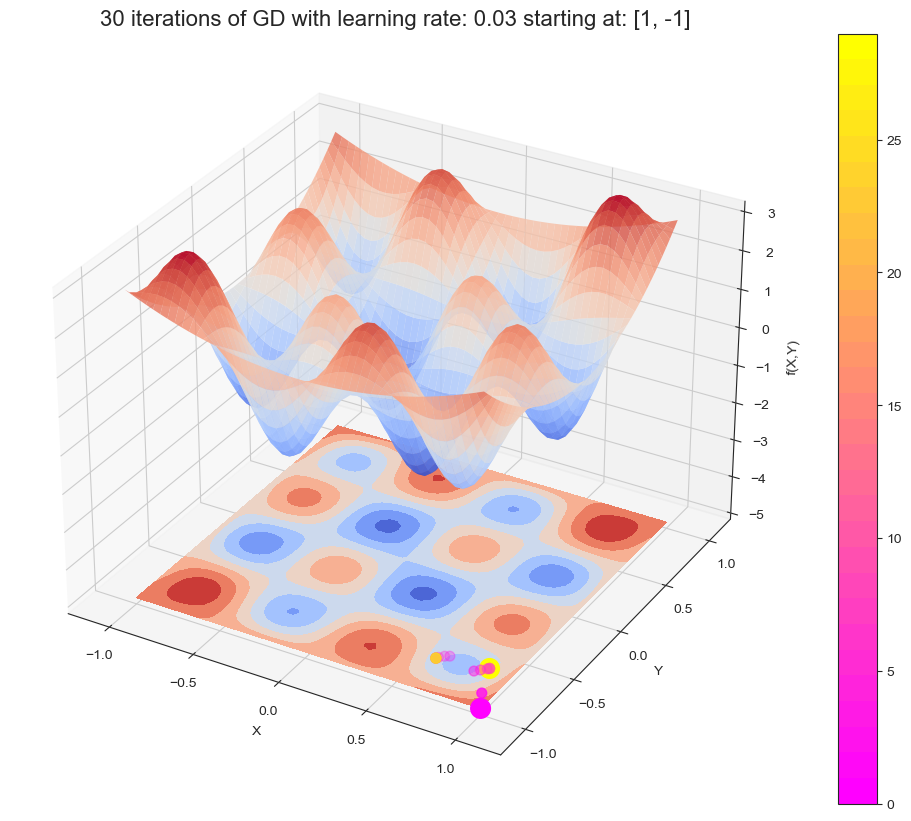

In [204]:
cmap = colormaps.get_cmap('spring')

# setup plot
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');
ax.set_xlabel('X');
ax.set_xlim(-1.2, 1.2);
ax.set_ylabel('Y');
ax.set_ylim(-1.2, 1.2);
ax.set_zlabel('f(X,Y)');
ax.set_zlim(-5, 3.1);
plt.title("{} iterations of GD with learning rate: {} starting at: {}".format(curr_iter,eta,initialGuess),
          fontsize=16)

# plot the surface and contour plot
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.8);
contour = ax.contourf(X, Y, f(X,Y), zdir='z', offset=-5, cmap=cm.coolwarm)

# scatter our gradient descent steps
ax.scatter3D([xPath[0],xPath[-1]],[yPath[0],yPath[-1]],[-5,-5],s=200, alpha=1, c=[0,1], cmap = cm.get_cmap('spring', 2))
scatter = ax.scatter3D(xPath,yPath,-5,c=np.arange(curr_iter), cmap = cm.get_cmap('spring', curr_iter),s=50);
fig.colorbar(scatter);

In this image, the colorbar serves to let you know in what **order** the steps were taken. What do you notice?

**Answer:** because the learning rate is too big to reach the true local minimum, it is moving around in the valley forever.

## Run your own experiments

Re rerun the method above with the following paramters and fill in the table with your results:

|Initial Guess|Eta|Iterations|End Point|
|-------------|---|----------|---------|
|(-1,-1)|0.1|50|(0.5292919871244918, -0.4958145909276507)|
|(-1,-1)|0.05|50|(-0.25379766204231174, 0.33660614975214737)|
|(-1,-1)|0.03|50|(0.867654304330322, -0.671042351692291)|
|(-1,-1)|0.01|50|(0.7313111326492601, -0.7135576660618449)|
|(-1,-1)|0.1|100|(0.02028373920908011, 0.03814655557360974)|
|(-1,-1)|0.05|100|(-0.09998114398218474, -0.10754068521892185)|
|(-1,-1)|0.03|100|(0.867654304330322, -0.671042351692291)|
|(-1,-1)|0.01|100|(0.7313111326492601, -0.7135576660618449)|


Feel free to start from different points, and fill out more observations on this table. What do you notice?

In [209]:
initialGuess = [1, -1]

for eta in [0.1, 0.05, 0.03, 0.01]:
    for max_iter in [50,100]:

        delta = 0.001

        curr_iter = 1

        # set starting point
        x_old = initialGuess[0]
        y_old = initialGuess[1]

        # setup path holding variables as lists
        xPath = [initialGuess[0]]
        yPath = [initialGuess[1]]
        fPath = [f(x_old,y_old)]
        x_new = 0
        y_new = 0

        # carry out gradient descent
        while curr_iter < max_iter:

            # take a step in the negative gradient direction
            x_new = x_old - eta * f_prime_x(x_old,y_old)
            y_new = y_old - eta * f_prime_y(x_old,y_old)

            # calculuate delta
            curr_delta = np.linalg.norm(np.asarray((x_new,y_new)) - np.asarray((x_old,y_old)),2)
            if curr_delta < delta:
                break

            # store the function value for plotting
            f_new = f(x_new,y_new)
            xPath.append(x_new)
            yPath.append(y_new)
            fPath.append(f_new)

            # update x_old and y_old
            x_old = x_new
            y_old = y_new

            curr_iter += 1

        # convert back from list to array
        xPath = np.asarray(xPath)
        yPath = np.asarray(yPath)
        fPath = np.asarray(fPath)

        # print start and end points
        endPoint = (xPath[-1],yPath[-1])

        print("Staring at:{}, eta:{} and max iteration:{}, GD ended at:{} with {} steps".format(initialGuess
                                                                              , eta, max_iter, endPoint,fPath.shape[0]))

Staring at:[1, -1], eta:0.1 and max iteration:50, GD ended at:(0.5292919871244918, -0.4958145909276507) with 50 steps
Staring at:[1, -1], eta:0.1 and max iteration:100, GD ended at:(0.02028373920908011, 0.03814655557360974) with 100 steps
Staring at:[1, -1], eta:0.05 and max iteration:50, GD ended at:(-0.25379766204231174, 0.33660614975214737) with 50 steps
Staring at:[1, -1], eta:0.05 and max iteration:100, GD ended at:(-0.09998114398218474, -0.10754068521892185) with 100 steps
Staring at:[1, -1], eta:0.03 and max iteration:50, GD ended at:(0.867654304330322, -0.6710423516922909) with 50 steps
Staring at:[1, -1], eta:0.03 and max iteration:100, GD ended at:(0.867654304330322, -0.671042351692291) with 100 steps
Staring at:[1, -1], eta:0.01 and max iteration:50, GD ended at:(0.7313111326492601, -0.7135576660618449) with 8 steps
Staring at:[1, -1], eta:0.01 and max iteration:100, GD ended at:(0.7313111326492601, -0.7135576660618449) with 8 steps


/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_47554/807997646.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter3D([xPath[0],xPath[-1]],[yPath[0],yPath[-1]],[-5,-5],s=200, alpha=1, c=[0,1], cmap = cm.get_cmap('spring', 2))
/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_47554/807997646.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = ax.scatter3D(xPath,yPath,-5,c=np.arange(curr_iter), cmap = cm.get_cmap('spring', curr_iter),s=50);


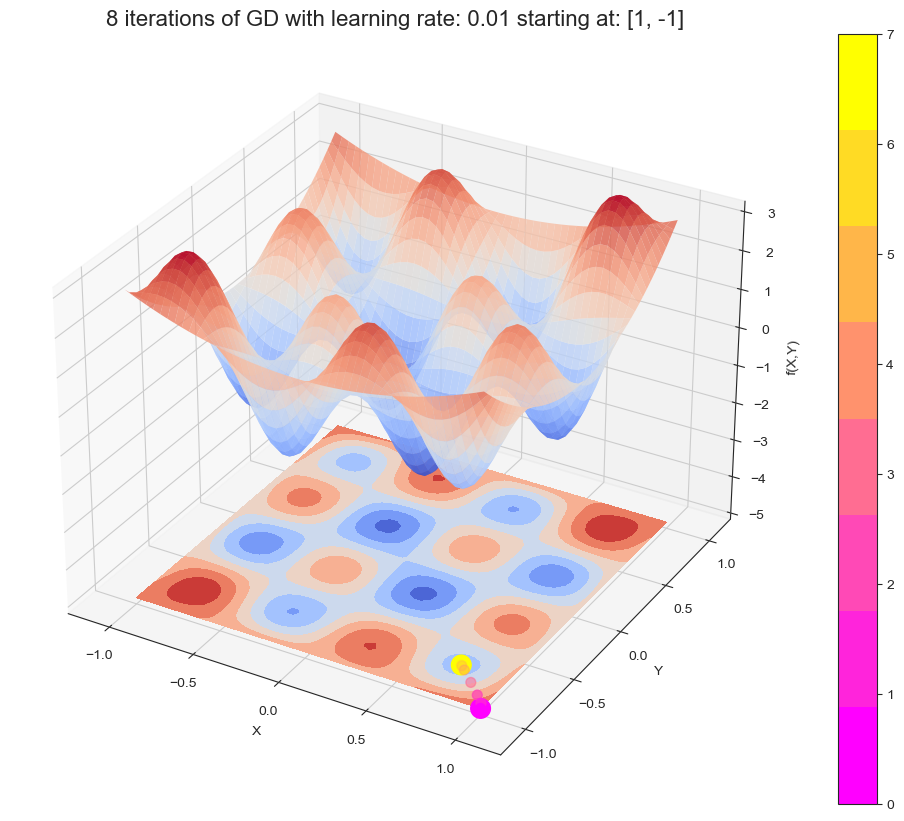

In [210]:
cmap = colormaps.get_cmap('spring')

# setup plot
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');
ax.set_xlabel('X');
ax.set_xlim(-1.2, 1.2);
ax.set_ylabel('Y');
ax.set_ylim(-1.2, 1.2);
ax.set_zlabel('f(X,Y)');
ax.set_zlim(-5, 3.1);
plt.title("{} iterations of GD with learning rate: {} starting at: {}".format(curr_iter,eta,initialGuess),
          fontsize=16)

# plot the surface and contour plot
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.8);
contour = ax.contourf(X, Y, f(X,Y), zdir='z', offset=-5, cmap=cm.coolwarm)

# scatter our gradient descent steps
ax.scatter3D([xPath[0],xPath[-1]],[yPath[0],yPath[-1]],[-5,-5],s=200, alpha=1, c=[0,1], cmap = cm.get_cmap('spring', 2))
scatter = ax.scatter3D(xPath,yPath,-5,c=np.arange(curr_iter), cmap = cm.get_cmap('spring', curr_iter),s=50);
fig.colorbar(scatter);

**Answer:** with learning rate = 0.01, it only took 8 iterations to get converge to the true local minimum.

Lets compare this to `scipy`'s build in optimizer.

*Note:* I redefine a *special* version of f above, because of the way `scipy`'s optimizer expects it to be. It expects its input as a vector. 

In [22]:
fSpec = lambda vals: vals[0]**2 + vals[1]**2 + 2*np.sin(2*np.pi*vals[0])*np.sin(2*np.pi*vals[1])

With a starting point of: [1, 1]
The optimizer ended at : [0.97489116 0.97489116]
With a starting point of: [1, -1]
The optimizer ended at : [ 0.24381785 -0.24381786]
With a starting point of: [-1, 1]
The optimizer ended at : [-0.24381786  0.24381785]
With a starting point of: [-1, -1]
The optimizer ended at : [-0.97489116 -0.97489116]


/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_2327/2184115787.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('spring', 2)
/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_2327/2184115787.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('spring', 2), alpha=1)


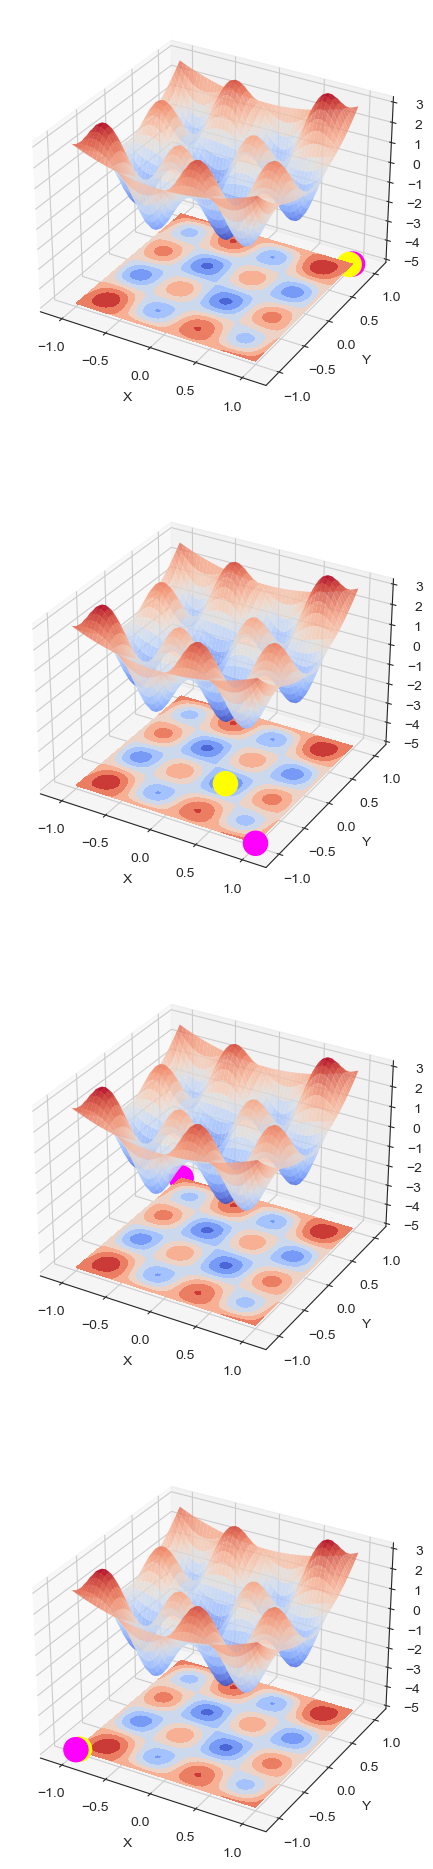

In [31]:
# Create a 4x1 grid of subplots
fig, axs = plt.subplots(4, 1, figsize=(6, 24), subplot_kw={'projection': '3d'})

for i, initialGuess in enumerate([[1,1],[1,-1],[-1,1],[-1,-1]]):

    result = sp.optimize.minimize(fSpec, initialGuess)

    optimizerEndPoint = result.x
    print("With a starting point of:",initialGuess)
    print("The optimizer ended at :",optimizerEndPoint)

    # setup plot
    ax = axs[i]
    ax.set_xlabel('X')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylabel('Y')
    ax.set_ylim(-1.2, 1.2)
    ax.set_zlabel('f(X,Y)')
    ax.set_zlim(-5, 3.1)

    # plot the surface and contour plot
    surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, 
                           linewidth=0, antialiased=True, alpha=0.8)

    cset = ax.contourf(X, Y, f(X,Y), zdir='z', 
                       offset=-5, cmap=cm.coolwarm)

    # plot the optimization start and end
    cmap = cm.get_cmap('spring', 2)
    cset = ax.scatter([initialGuess[0], optimizerEndPoint[0]],
                      [initialGuess[1],optimizerEndPoint[1]], -5, s=300, c=[0,1],
                      cmap = cm.get_cmap('spring', 2), alpha=1)



    fig.colorbar(scatter)

**Answer:** scipy's optimizer found the global minimum instead of the local minimum.

Change the initial guess above to the four corners, and see where you end up. Fill out this table:

|Initial Guess|End Point|
|-------------|---------|
|(1,1)|[0.97489116 0.97489116]|
|(1,-1)|[ 0.24381785 -0.24381786]|
|(-1,1)|[-0.24381786  0.24381785]|
|(-1,-1)| [-0.97489116 -0.97489116]|

What do you notice?

**Answer:** only the initial guess at (1,-1) reached the global minimum. All the other initial guesses failed to outperformance the (1,-1), which means it's very important to select a right initial guess.

---

# Problem 2

Now that weve talked about the linear model in class, we can actually do some **learning** on real data! In this problem we're going to be exploring the famous **MNIST** dataset

First, lets load the data:

In [2]:
trainData = np.loadtxt('Digits.train')
print("Training data shape:", trainData.shape)

testData = np.loadtxt('Digits.test')
print("Training data shape:", testData.shape)

Training data shape: (7291, 257)
Training data shape: (2007, 257)


The data is organized such that each line of our matrix consists of the digit id `(0-9) `followed by the `256` grayscale values. So we extract the first (in python this is the zero-th) digit like this:

In [3]:
label = trainData[0, 0]
digit = trainData[0,1:]

Now, we need to `reshape` this vector, into a $16 \times 16$ matrix to plot it:

In [4]:
digitImage = np.reshape(digit,(16,16))

Now we can finally plot it!

(-0.5, 15.5, 15.5, -0.5)

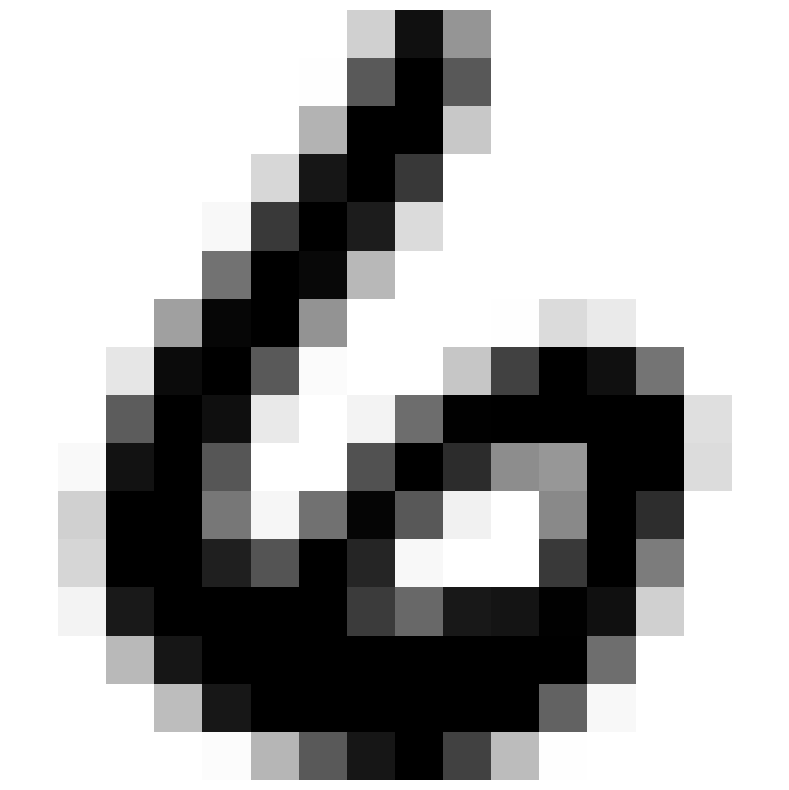

In [5]:
plt.imshow(digitImage,cmap='gray_r')
plt.axis('off')

Its label is: 

In [6]:
print("The label is:",label)

The label is: 6.0


Ok, now we can split this into our actual data and labels:

In [7]:
trainLabels = trainData[:,0].astype('int')
trainData = trainData[:,1:]

testLabels = testData[:,0].astype('int')
testData = testData[:,1:]

Below, we pick a random set of 25 images from this data set to plot:

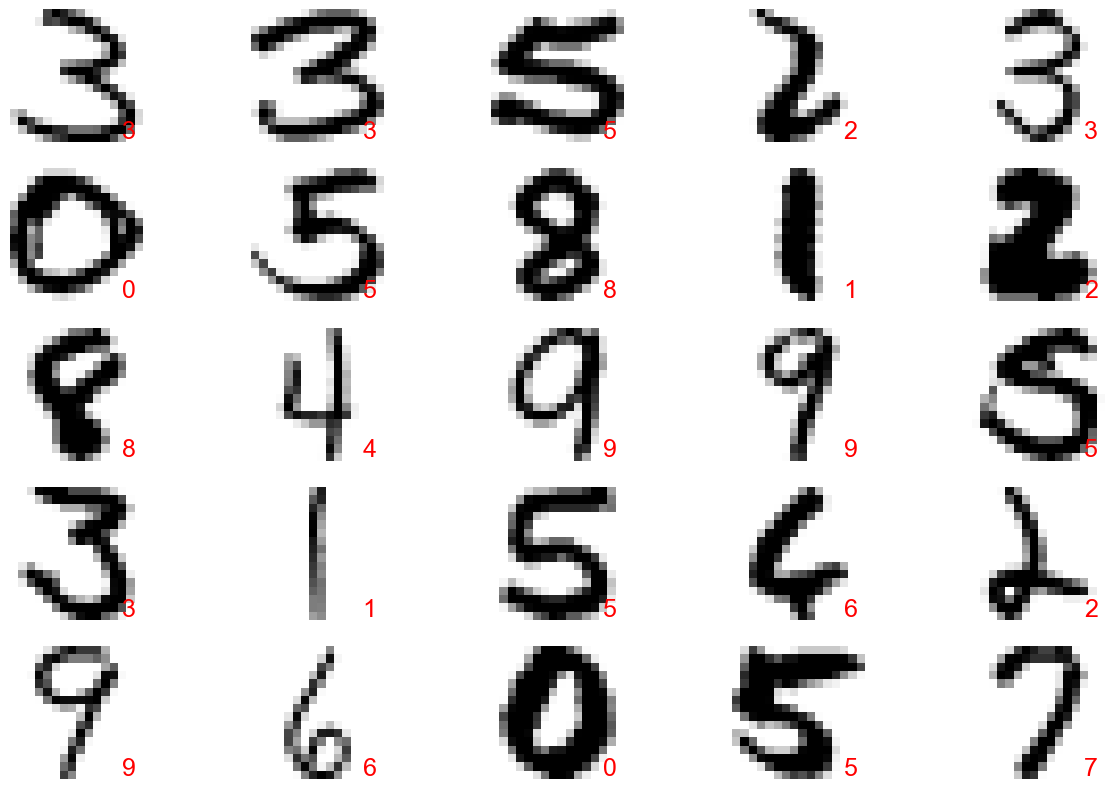

In [8]:
fig, axArr = plt.subplots(5,5,figsize=(15,10))

# loop through all rows
for currRow in range(5):
    # loop through all columns
    for currCol in range(5):
        # select the random digit
        randomDigitNumber = np.random.randint(trainData.shape[0])
        randomDigitLabel = trainLabels[randomDigitNumber]
        randomDigit = trainData[randomDigitNumber,:]
        randomDigitImage = np.reshape(randomDigit,(16,16))
        
        # plot it
        currentAxis = axArr[currRow,currCol]
        currentAxis.axis('off')
        
        currentAxis.imshow(randomDigitImage,cmap='gray_r')
        currentAxis.text(13,15,str(int(randomDigitLabel)),color='red',fontsize=18)

Re-run that cell a couple of times to get a feel for the data. See if you can discover some challenging ones.

Now lets get a feel for our how data is distributed, by plotting a normed histogram of our labels:

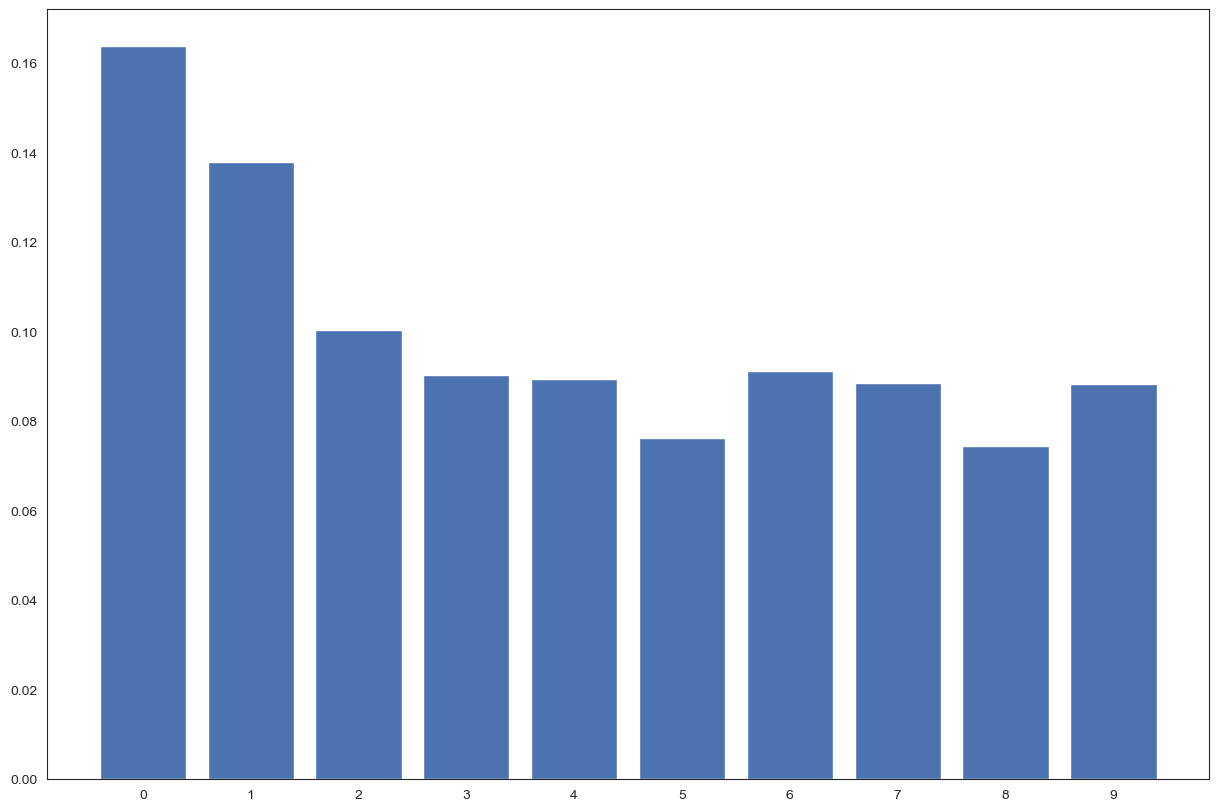

In [9]:
plt.hist(trainLabels, bins=np.arange(11), align='left', rwidth=0.8, density=True)
_ = plt.xticks(np.arange(10))

We can also have numpy gives us the percentages of our labels:

In [10]:
labels,counts = np.unique(trainLabels, return_counts = True)
percentages = np.round(100*counts/sum(counts),2)

for i in range(10):
    currLabel = labels[i]
    currPerc = percentages[i]
    print("Label {} is {}%".format(currLabel,currPerc))

Label 0 is 16.38%
Label 1 is 13.78%
Label 2 is 10.03%
Label 3 is 9.02%
Label 4 is 8.94%
Label 5 is 7.63%
Label 6 is 9.11%
Label 7 is 8.85%
Label 8 is 7.43%
Label 9 is 8.83%


So we have some data inbalance in our training set. We wont deal with that directly in this homework, but its good practice to first **visualize** your data to get a feel for it before you *learn* on it.

## Feature Extraction

In machine learning and data science, a difficult but necessery skill is to be able to **extract meaningful features from your data.**

For MNIST, we're going to extract features from the our images. Lets look at two specific features: 

* **intensity** - the sum of all pixel values in an image, from 0 to 1
* **symmetry** - the **negative** sum of the absolute value of the difference between an image, and its *vertically* flipped version

Intensity should be easy to directly calculate:

In [11]:
intensity = np.sum(trainData, axis = 1)

Symmetry requires a little more *thought* about sizes. 

The **bread and butter** of statistical computing in many languages (matlab, python, etc) is reasoning about multi-dimensional matrices. In `numpy` these are called `arrays`. Right now our training data is in the shape `number of Training examples by length of each example`:

In [12]:
trainData.shape

(7291, 256)

In this representation, each "image" is a $256$ length vector. It would be easier for some things, to have this directly in a `16 by 16` array.

Lets `reshape` our training data into a `3 dimensional array` of size: `number of training examples BY 16 by 16`. You can imagine this like this:

![](sizes.png)

**Note**: A useful feature of `reshape` is that we can pass `-1` for one of the dimensions and have `numpy` automagically figure out what it should be for us.

In [13]:
reshapedTrainData = trainData.reshape(-1, 16,16)

print("Size of training data before reshape:",trainData.shape)
print("Size of reshaped training data:",reshapedTrainData.shape)

Size of training data before reshape: (7291, 256)
Size of reshaped training data: (7291, 16, 16)


With this, we can now calculate **symmetry** to be:

In [14]:
# horizontal symmetry
horizFlip = np.flip(reshapedTrainData,axis=1)
horizSym = np.mean(np.abs(reshapedTrainData - horizFlip),axis=(1,2))

# vertical symmetry
vertFlip = np.flip(reshapedTrainData,axis=2)
vertSym = np.mean(np.abs(reshapedTrainData - vertFlip),axis=(1,2))

# stack and average
symmetry = -np.mean(np.column_stack((horizSym,vertSym)),axis=1)

Now we have calculated our features for each training example, lets stack them together into an object we can deal with:

In [15]:
trainFeatures = np.column_stack((intensity,symmetry))
trainFeatures.shape

(7291, 2)

So we've reduced the `7291 x 256` training data to our `7291 x 2` **feature representation.**

## 1 vs 5

Lets now focus just on trying to tell apart a $1$ from a $5$. Since its annoying to keep track of sizes, were going to introduce the `pandas` library.

In [16]:
df = pd.DataFrame(trainFeatures,columns=['Intensity','Symmetry'])
df['Label'] = trainLabels

df.head()

,Intensity,Symmetry,Label
0,-81.361,-0.566117,6
1,-28.605,-0.687102,5
2,-137.727,-0.360844,4
3,-153.459,-0.441797,7
4,-106.529,-0.544008,3


Now we can define a dataframe specifically for labels of `1` or `5` using `masking`, where we've replaced the `5` label with a `-1` label:

In [17]:
df1or5 = df[(df.Label == 1) | (df.Label == 5)].copy()
df1or5.loc[df1or5['Label'] == 5,'Label'] = -1
df1or5.head()

,Intensity,Symmetry,Label
1,-28.605,-0.687102,-1
7,-193.002,-0.088484,1
9,-197.704,-0.116422,1
12,-196.930,-0.048250,1
13,-203.632,-0.047352,1


With this in hand, we can `scatter` them in feature space: 

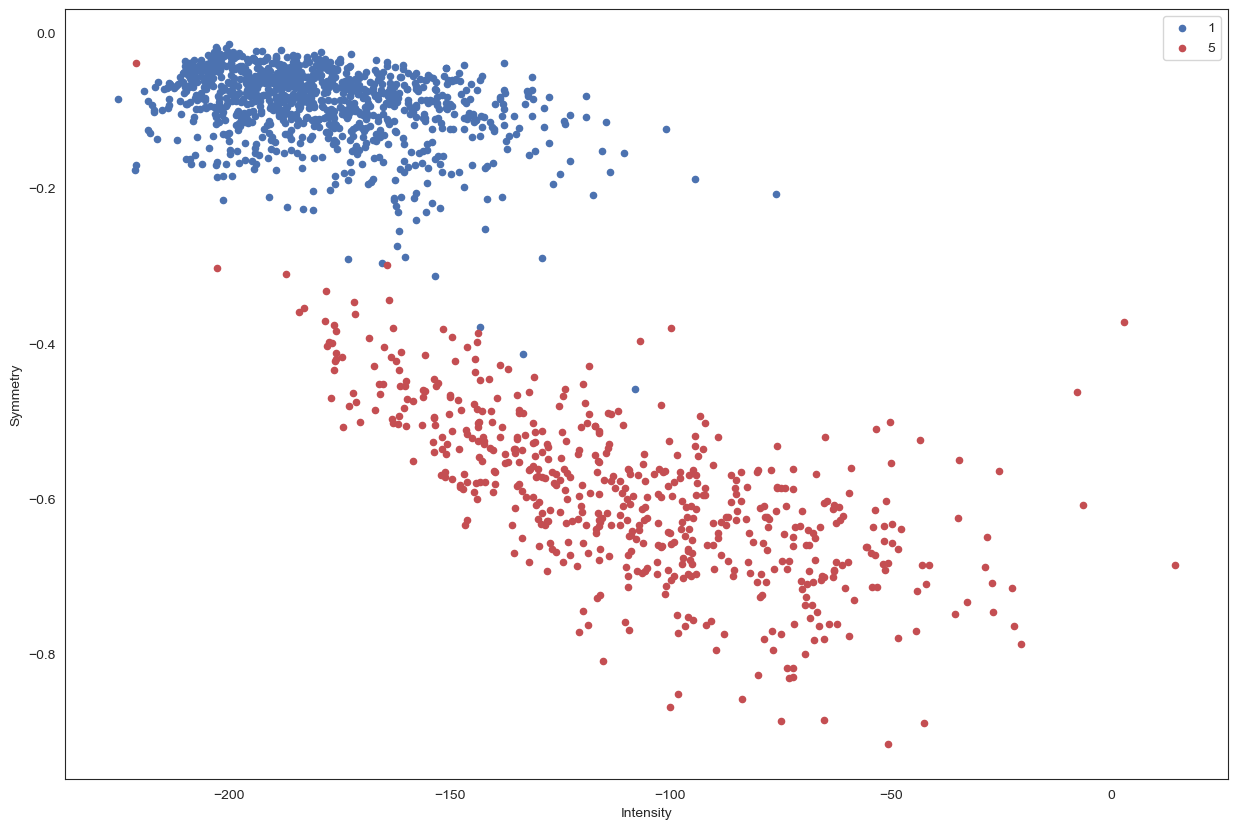

In [18]:
ax = df1or5[df1or5.Label == 1].plot.scatter(x='Intensity',y='Symmetry',label='1', color='b');
df1or5[df1or5.Label == -1].plot.scatter(x='Intensity',y='Symmetry', label='5', ax=ax, color='r');

Already we can see that there is some nice separation for these two features, on these two digits.

## 2.A - Linear Regression for Classification

Now, we're going to implement our linear regression classifier that we discussed in class. Recall for linear regression we solve to get:

$$
X \in \mathbb{R}^{N \times d} =
\begin{bmatrix}
\text{---}  \boldsymbol{x}^T_1  \text{---} \\
\text{---}  \boldsymbol{x}^T_2 \text{---} \\
 \vdots  \\
\text{---}  \boldsymbol{x}^T_N  \text{---}
\end{bmatrix} \;\;\;\; \text{and} \;\;\;\;
\boldsymbol{y} \in \mathbb{R}^{N}= 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_N
\end{bmatrix} \\[0.75in]
\boldsymbol{w}_{lin} = \left( X^T X\right)^{-1} X^T \cdot \boldsymbol{y}
$$ 

**Note:** In class we glossed over a small conceptual point - To get this very slick notation,  we implicitly deal with the *intercept/bias* term by including it in as a *feature* of value $1$. This means that for us, we have each example represented as: 
$$\boldsymbol{x}^T = [1, intensity, symmetry]$$

And so our weight vector will be of size $3$: 
$$\boldsymbol{w}_{lin} = [w_1, w_2, w_3]$$ 

Recall that in python, these will actually be 
$$w_0, w_1, w_2$$

Below, we will be implementing this

In [19]:
X = df1or5[['Intensity', 'Symmetry']].values
X, X.shape

(array([[-2.86050000e+01, -6.87101562e-01],
        [-1.93002000e+02, -8.84843750e-02],
        [-1.97704000e+02, -1.16421875e-01],
        ...,
        [-1.56107000e+02, -1.52242187e-01],
        [-1.69551000e+02, -7.27812500e-02],
        [-1.14575000e+02, -1.14531250e-01]]),
 (1561, 2))

Lets go about actually adding that column of $1$'s:

In [20]:
X = np.column_stack((np.ones(X.shape[0]),X))
X.shape

(1561, 3)

In [21]:
y = df1or5['Label'].values
y.shape

(1561,)

Now we're ready to actually implement the above formula!

In [22]:
w_lin = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w_lin.shape

(3,)

And thats it! We're done learning! Wow! That was easy!

In order to visualize the line specified by our weight vector, we need to convert that format to the more familiar slope, intercept format. 

**The three weights define the equation $w_0 + w_1x_1 + w_2x_2$ where $x_1$ is the intensity and $x_2$ the symmetry. Since we want to plot intensity vs simmetry let's rename $x_1 = x$ and $x_2 = y$, and re-write the $w_0 + w_1x_1 + w_2x_2$ as:**

$$w_0 + w_1x + w_2y$$

**which is the equation of a line. Let's find two points that lies on the line by solving:**

$$w_0 + w_1x + w_2y = 0$$

**The x-intercept is:**

$$x = -\frac{w_0 + w_2y}{w_1}$$

**and the y-intercept is:**

$$y = -\frac{w_0 + w_1x}{w_2}$$

**If we set $x = 0$, then $y = - w_0/w_2$. Similarly, if we set $y = 0$ we can derive $x = -w_0/w_1$
This give us two points that lie on the line: $(0, -w_0/w_2)$ and $(-w_0/w_1, 0)$ which can be used to find the intercept and the slope of the line we want!** 

In [23]:
slope_lin = (-w_lin[0]/w_lin[2])/(w_lin[0]/w_lin[1])
intercept_lin = - w_lin[0]/w_lin[2]

Now we're ready to plot the decision boundary created by our weight vector:

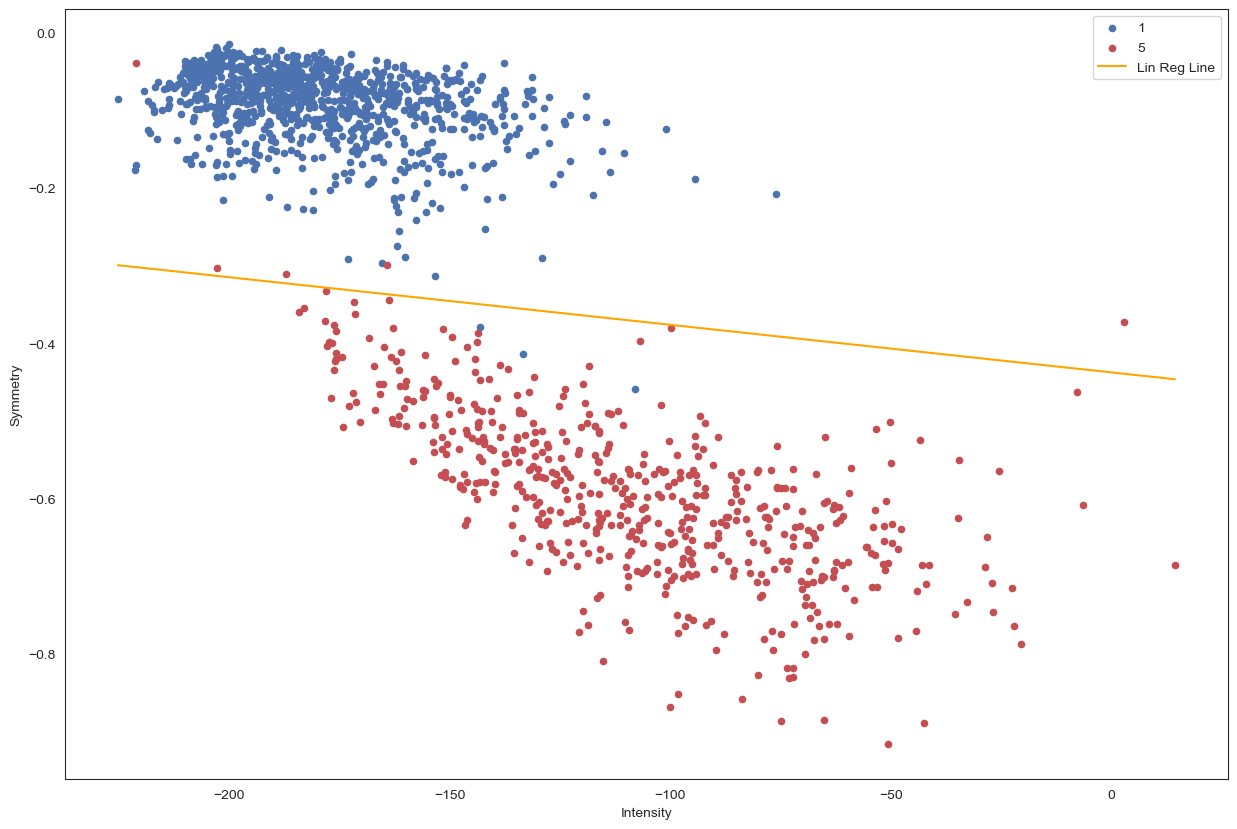

In [24]:
intensityRange = np.linspace(df1or5.Intensity.min(), df1or5.Intensity.max())

# plot 1's
ax = df1or5[df1or5.Label == 1].plot.scatter(x='Intensity',y='Symmetry',label='1', color='b');

# plot 5's
df1or5[df1or5.Label == -1].plot.scatter(x='Intensity',y='Symmetry', label='5', ax=ax, color='r');

# plot our linear regression line
plt.plot(intensityRange,slope_lin*intensityRange+intercept_lin,color='orange',label='Lin Reg Line');

plt.legend();

What do you notice about this line?

**Answer:** This line divided the feature space into two section. And most of the dots are divided into the right section they belong to.

Lets actually use this to **classify**, and generate a $\boldsymbol{\hat{y}}$:

In [25]:
y_hat = np.where(X.dot(w_lin)>0, 1,-1)

Now lets visualize those wrong points:

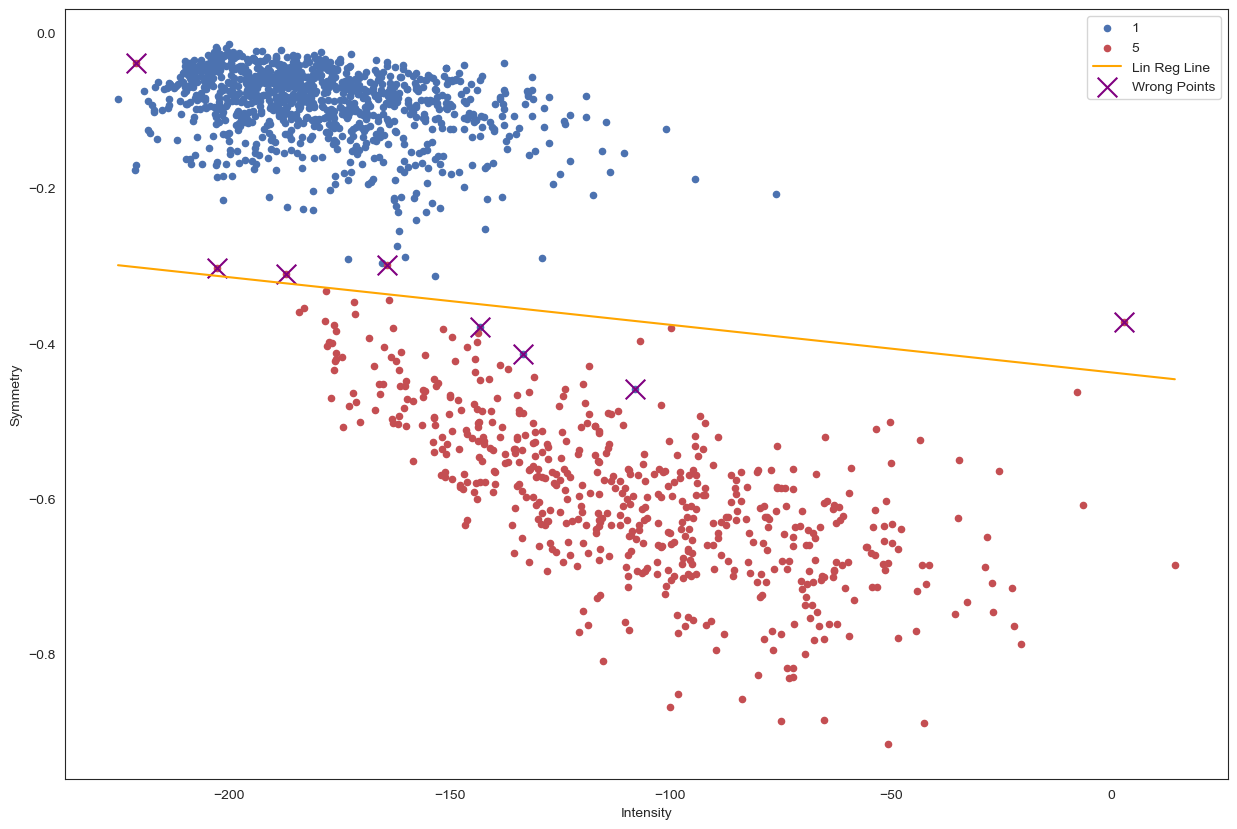

In [26]:
intensityRange = np.linspace(df1or5.Intensity.min(), df1or5.Intensity.max())

# plot 1's
ax = df1or5[df1or5.Label == 1].plot.scatter(x='Intensity',y='Symmetry',label='1', color='b');

# plot 5's
df1or5[df1or5.Label == -1].plot.scatter(x='Intensity',y='Symmetry', label='5', ax=ax, color='r');

# plot our linear regression line
plt.plot(intensityRange,slope_lin*intensityRange+intercept_lin,color='orange',label='Lin Reg Line');

# plot wrong points
wrongPoints = X[y_hat != y]
plt.scatter(wrongPoints[:,1], wrongPoints[:,2], color='purple',s=200,marker='x',label='Wrong Points');

plt.legend();

Just for completion, we can compare our hard coded result, to `scikit learn`'s ordinary least squares implementation of linear regression:

In [27]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X[:,1:], y)   # the first column of X is ones
print("Regression coefficiants:",reg.coef_)
print("Regression intercept:",reg.intercept_)

Regression coefficiants: [2.43866303e-03 3.98025320e+00]
Regression intercept: 1.7401778985948984


Compare to our weight vector (which contains the intercept within it, as explained above):

In [28]:
w_lin

array([1.74017790e+00, 2.43866303e-03, 3.98025320e+00])

They're exact! Why is this expected or not-expected? Reflect below:

**Answer:** this is expected, because both are using linear regression, and linear regression always gives the same outcome.

## 2.B - Logistic Regression for Classification

Now that we have a firm understanding of GD under our belt, we can **finally** tackle logistic regression!

Recall from class that for logistic regression, we are trying to minimize the **cross-entropy** loss:

$$
E_{in} = \frac{1}{N}\sum_{i=1}^N\ln\left(1+e^{-y_n\boldsymbol{w}^T\boldsymbol{x}_n}\right)
$$

You might remember how to calculate the gradient of this function directly. If you don't here it is!

$$
\nabla E_{in} = -\frac{1}{N}\sum_{n=1}^N \frac{y_n\boldsymbol{x}_n}{1+e^{y_n\boldsymbol{w}^T(t)\boldsymbol{x}_n}}
$$

With that in hand, then the algorithm for logistic regression is simply:

1. Initialize weights at time step $t=0$
2. For $t=0,1,\ldots,N$ do:
  * Compute the gradient described above: $\nabla E_{in}(\boldsymbol{w}(t))$
  * Move in the negative gradient direction: $\hat{\boldsymbol{v}}_t = - \nabla E_{in}(\boldsymbol{w}(t))$
  * Update the weights: $\boldsymbol{w}(t+1) = \boldsymbol{w}(t) + \eta \boldsymbol{v}_t$
  
3. Return $\boldsymbol{w}_{log}$

**Why Use Cross-Entropy?**

Cross-entropy is particularly useful because, under this loss function, the process of learning the model parameters in logistic regression becomes a convex optimization problem. This means that there exists a single minimum value for the loss function, making it easier and more efficient to train the model using optimization algorithms like gradient descent.

**Notice:** The above gradient is only applicable to y in -1, 1 rather than 0,1

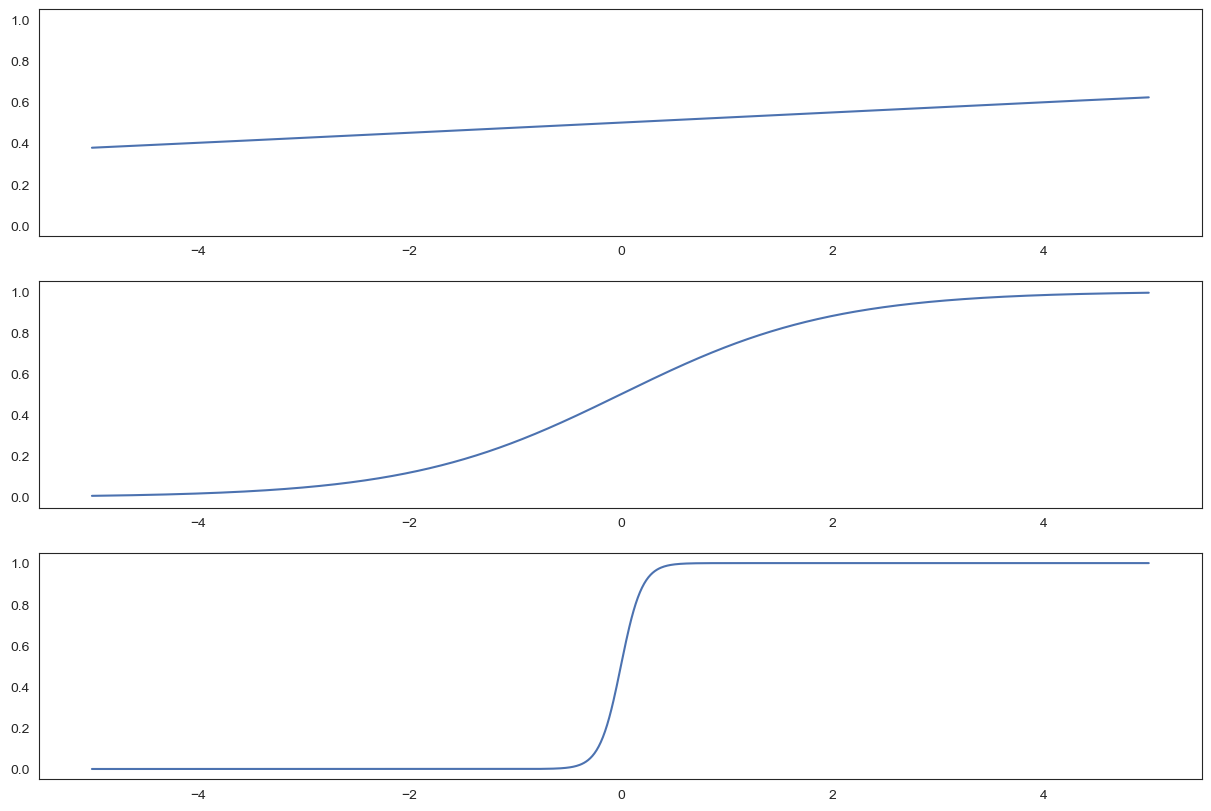

In [159]:
# To have a basic idea about how 1D logistic regression looks like

def g(x,a,b):
     return 1/(1+np.exp(-a-b*x))

x = np.arange(-5,5,0.01)
y = np.arange(-5,5,0.01)
        
fig, axs = plt.subplots(3, 1, sharey = True)

for i, b in enumerate([0.1,1,10]):
    axs[i].plot(x,g(x,0,b))

plt.show()

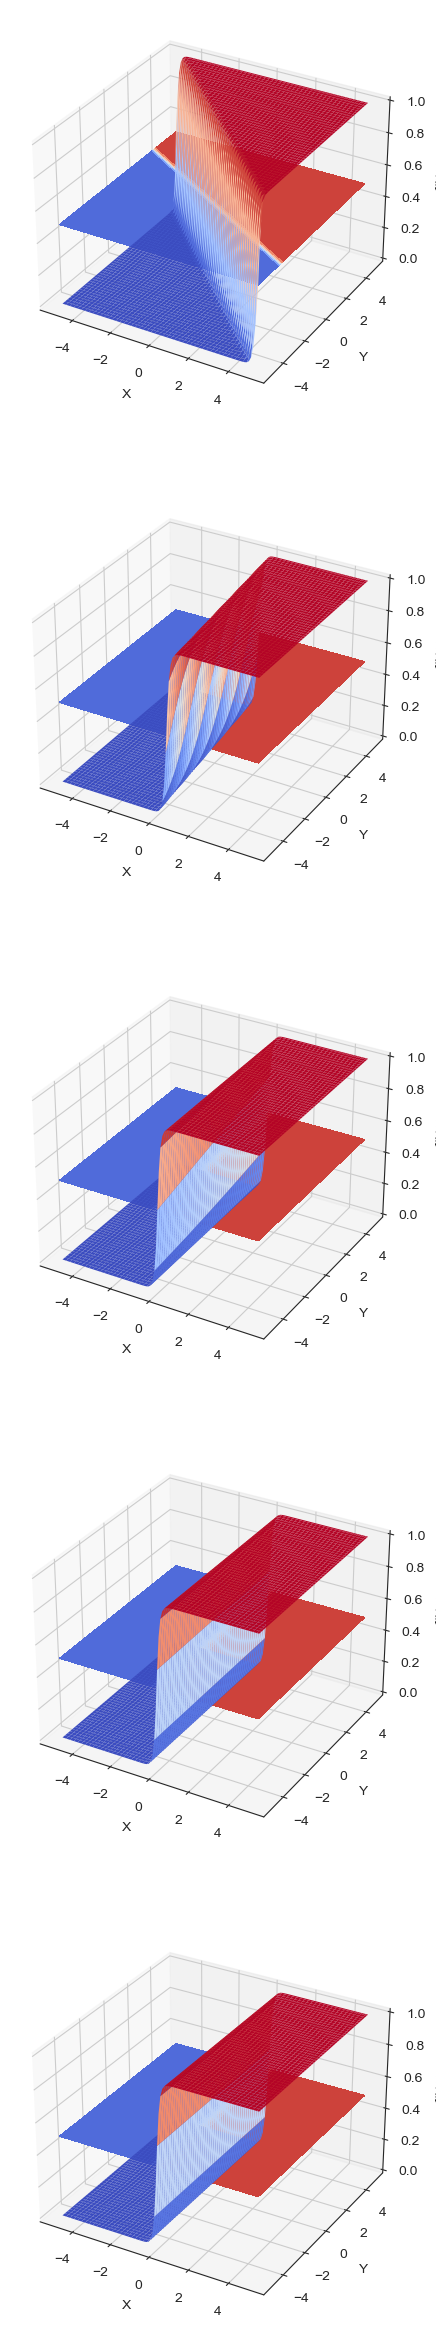

In [160]:
# To have a basic idea about how 2D logistic regression looks like

def g(x, y, a, b, c):
    return 1 / (1 + np.exp(-a - b * x - c * y))
cmap = colormaps.get_cmap('spring')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10,30))

for i, c in enumerate([10,1,0.1,0.01,0.001]):
    ax = fig.add_subplot(5, 1, i+1, projection='3d')
    ax.plot_surface(x, y, g(x, y, 0, 10, c),linewidth=0, cmap=cm.coolwarm)
    ax.set_zlim(0, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X,Y)')
    ax.contourf(x, y, g(x, y, 0, 6, c), zdir='z', offset=0.5, cmap=cm.coolwarm)
plt.show()

In [43]:
N = X.shape[0]
maxIter = 10000
eta = 0.5

# setup random weight values
w_log = np.random.rand(3)

# take a gradient descent step
for i in range(maxIter):
    
   
    # placeholder for running sum
    runningSum = 0    

    # calculate gradient at current weights
    for n in range(N):
        numerator = y[n] * X[n]
        denom =  1 + np.exp(y[n] * w_log.T.dot(X[n]))
        runningSum += numerator/denom

    eInGrad = -runningSum/N

    # take a step in the negative gradient direction
    w_log_new = w_log - eta * eInGrad
    
    # store for the next round
    w_log = w_log_new
    
    
w_0, w_1,w_2 = w_log
w_0, w_1,w_2 

slope_log = -w_1 / w_2
intercept_log = -w_0 / w_2

/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_44034/234638373.py:18: RuntimeWarning: overflow encountered in exp
  denom =  1 + np.exp(y[n] * w_log.T.dot(X[n]))


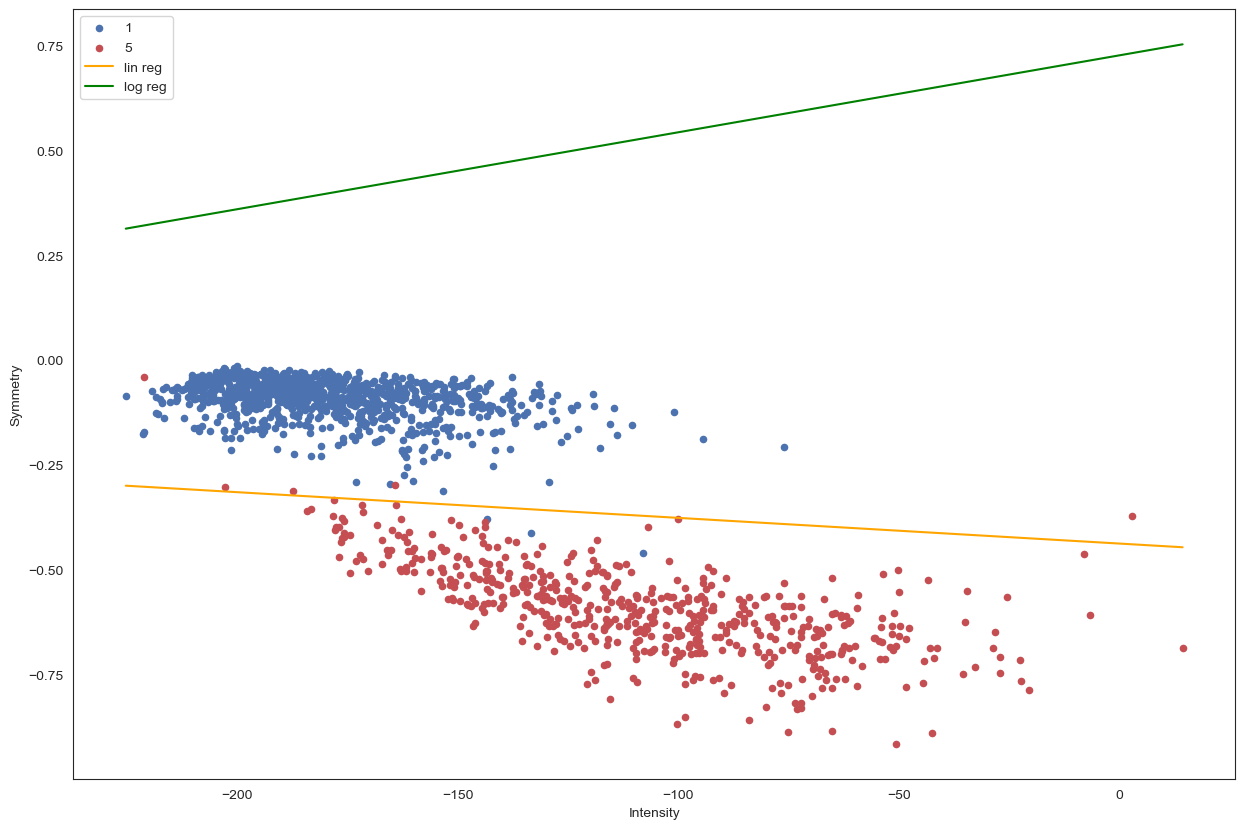

In [44]:
intensityRange = np.linspace(df1or5.Intensity.min(), df1or5.Intensity.max())

# plot 1's
ax = df1or5[df1or5.Label == 1].plot.scatter(x='Intensity',y='Symmetry',label='1', color='b');

# plot 5's
df1or5[df1or5.Label == -1].plot.scatter(x='Intensity',y='Symmetry', label='5', ax=ax, color='r');

# plot our linear regression line
plt.plot(intensityRange,slope_lin*intensityRange+intercept_lin, color='orange', label='lin reg');

# plot our logistic regression line
plt.plot(intensityRange,slope_log*intensityRange+intercept_log, color='green', label='log reg');

plt.legend();

**Answer:** Oops! the green line seems too far away from the yellow line.

Let me try different maximum iteration, eta, and initial guess.

In [37]:
N = X.shape[0]
maxIter = 10000
eta = 0.5

# setup better weight values
w_log = np.array([-793.8544169704895, -7.4523048386871595, 1427.472918799351])

# take a gradient descent step
for i in range(maxIter):
    
   
    # placeholder for running sum
    runningSum = 0    

    # calculate gradient at current weights
    for n in range(N):
        numerator = y[n] * X[n]
        denom =  1 + np.exp(y[n] * w_log.T.dot(X[n]))
        runningSum += numerator/denom

    eInGrad = -runningSum/N

    # take a step in the negative gradient direction
    w_log_new = w_log - eta * eInGrad
    
    # store for the next round
    w_log = w_log_new


/var/folders/qx/wt3y86vj50sg2s6pkc5y62l00000gn/T/ipykernel_44034/2103021519.py:18: RuntimeWarning: overflow encountered in exp
  denom =  1 + np.exp(y[n] * w_log.T.dot(X[n]))


In [38]:
w_0, w_1,w_2 = w_log
w_0, w_1,w_2 

(-770.3423757865612, -7.325781189005351, 1428.8245101311009)

In [39]:
slope_log = -w_1 / w_2
intercept_log = -w_0 / w_2

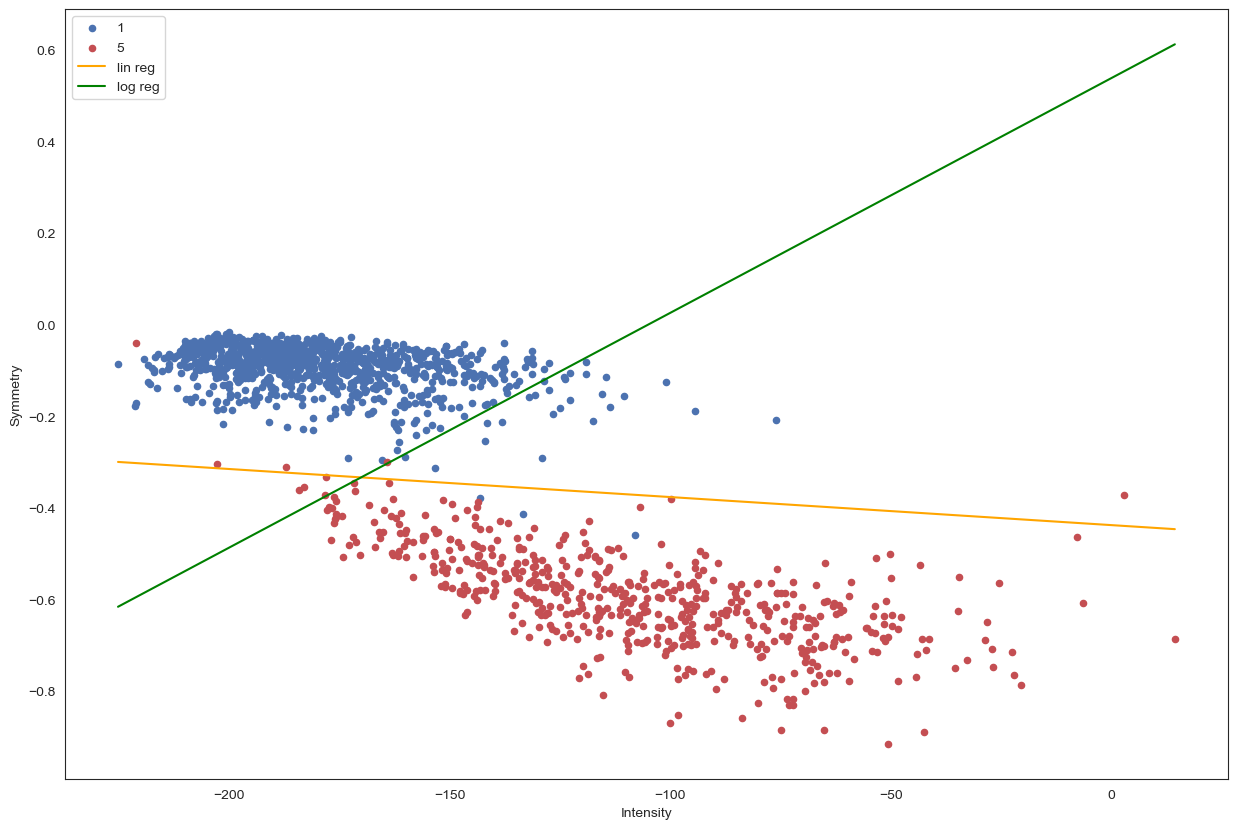

In [40]:
intensityRange = np.linspace(df1or5.Intensity.min(), df1or5.Intensity.max())

# plot 1's
ax = df1or5[df1or5.Label == 1].plot.scatter(x='Intensity',y='Symmetry',label='1', color='b');

# plot 5's
df1or5[df1or5.Label == -1].plot.scatter(x='Intensity',y='Symmetry', label='5', ax=ax, color='r');

# plot our linear regression line
plt.plot(intensityRange,slope_lin*intensityRange+intercept_lin, color='orange', label='lin reg');

# plot our logistic regression line
plt.plot(intensityRange,slope_log*intensityRange+intercept_log, color='green', label='log reg');

plt.legend();

**Answer:** Now this looks much better.

Lets compare to `scikit`'s implementation:

In [31]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X[:,1:], y)
print("Regression coefficiants:",logreg.coef_)
print("Regression intercept:",logreg.intercept_)

Regression coefficiants: [[-0.0296722 11.3670548]]
Regression intercept: [-0.58124282]


In [32]:
logCoef = logreg.coef_[0]
logInter = logreg.intercept_

In [33]:
slope_log_sp = - logCoef[0]/logCoef[1]
intercept_log_sp = - logreg.intercept_/logCoef[1]

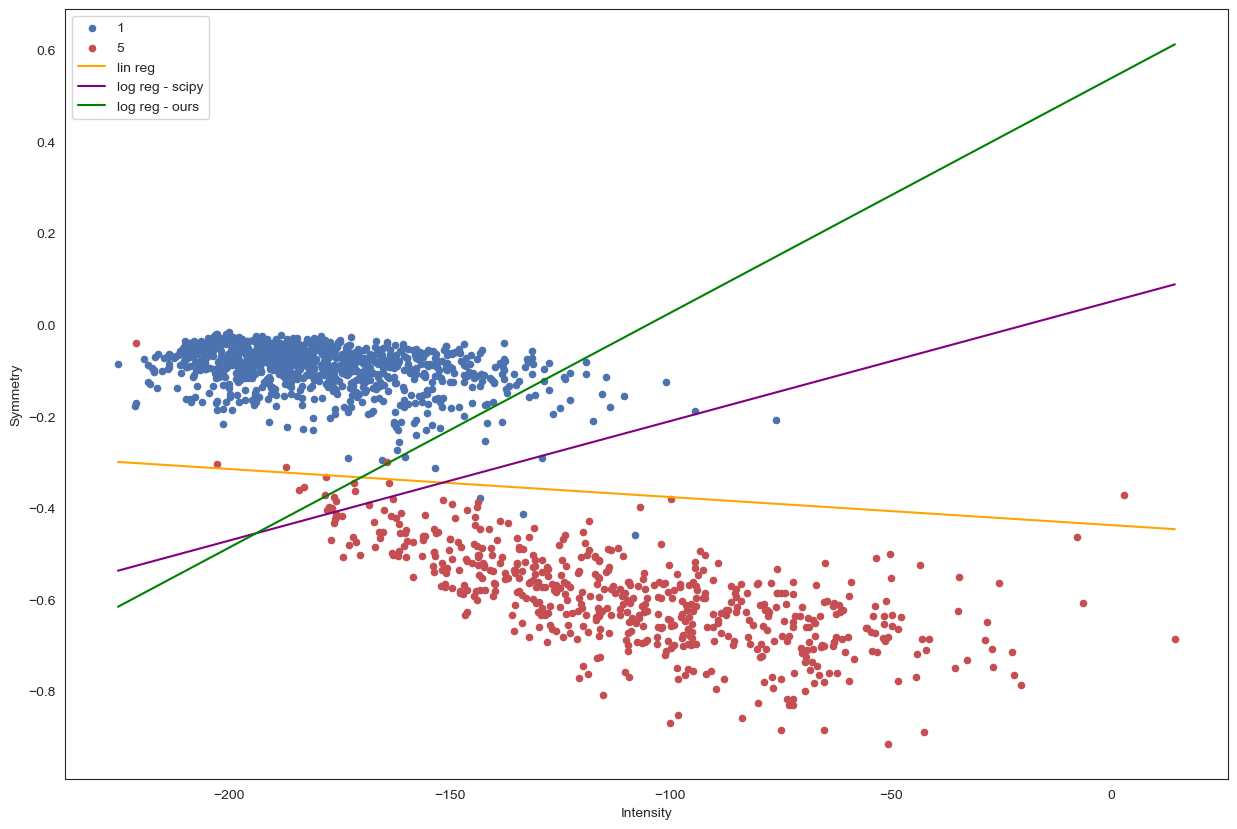

In [41]:
intensityRange = np.linspace(df1or5.Intensity.min(), df1or5.Intensity.max())

# plot 1's
ax = df1or5[df1or5.Label == 1].plot.scatter(x='Intensity',y='Symmetry',label='1', color='b');

# plot 5's
df1or5[df1or5.Label == -1].plot.scatter(x='Intensity',y='Symmetry', label='5', ax=ax, color='r');

# plot our linear regression line
plt.plot(intensityRange,slope_lin*intensityRange+intercept_lin, color='orange', label='lin reg');

# plot our logistic regression line
plt.plot(intensityRange,slope_log_sp*intensityRange+intercept_log_sp, color='purple', label='log reg - scipy');
plt.plot(intensityRange,slope_log*intensityRange+intercept_log, color='green', label='log reg - ours');

plt.legend();

Reflect on the above. What do you notice?

**Answer:** It took a significant amount of time to find the appropriate weights for the classification task. Initially, I set the maximum number of iterations to 10,000 and started with an initial guess at the origin point. However, the weights calculated were far from the true values. To address this, I increased the maximum number of iterations to 200,000, which resulted in more accurate weights. Upon inspection, I found the calculated weights to be (-770.3423757865612, -7.325781189005351, 1428.8245101311009).

The weights are quite large, which explains the high number of steps needed to reach the minimum value. This occurred because I failed to normalize the intensity of the variables. The lesson learned from this time-consuming computation is the importance of paying attention to the step size, especially in relation to the scale of the variables involved.

## 2.C - New Features

As we did above, define **your own** features and repeat the above analysis with either Linear regression **and** logistic regression, those **new features**! You can also try looking at different digit comparisons!

**The depth and quality of your investigation determines the score for this part!**

**Answer:** I list four possible features. These features can be used to classify different sets of numbers. For example, for classifying 1, 0, the aspect ratio is a good feature. 

- Aspect Ratio: This feature represents the ratio between the width and the height of the bounding box that contains the digit. It can help distinguish between numbers like '1' and '0', where '1' would generally have a higher aspect ratio.

- Number of Connected Components: You could use image segmentation techniques to find the number of connected components in an image. For example, '8' would generally have two connected components (the two loops), whereas '9' would have only one.

- Perimeter-to-Area Ratio: Calculate the perimeter of the digit and divide it by the area occupied by the digit. This can help in distinguishing between numbers like '0' and '1' or '8' and '3', as more complex shapes will have a higher perimeter-to-area ratio.

- Rotation Symmetry: Negative sum of the absolute value of the difference between an image, and its 90 degrees rotated version


Here I am going to use **Rotation Symmetry** and **Aspect Ratio** to classify 0 and 1. In this case the Flipping Symmetry is not proper because the 1 and 0 are both symmetric with regard to flipping.

In [79]:
trainData = np.loadtxt('Digits.train')
print("Training data shape:", trainData.shape)

testData = np.loadtxt('Digits.test')
print("Training data shape:", testData.shape)

Training data shape: (7291, 257)
Training data shape: (2007, 257)


In [80]:
trainData.shape

(7291, 257)

In [81]:
trainData0or1 = trainData[(trainData[:,0] == 0)|(trainData[:,0]== 1)].copy()

In [82]:
trainData0or1.shape

(2199, 257)

In [83]:
train0or1 = trainData0or1[:,1:]

label0or1 = trainData0or1[:,0]
# convert label 0 to -1 for further logistic regression
label0or1[label0or1==0] = -1

In [84]:
reshapedTrainData0or1 = train0or1.reshape(-1,16,16)

In [85]:
reshapedTrainData0or1.shape

(2199, 16, 16)

In [86]:
# Rotate the images
rotated_data = np.rot90(reshapedTrainData0or1, axes=(1, 2))

(-0.5, 15.5, 15.5, -0.5)

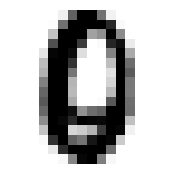

In [89]:
digitImage = np.reshape(reshapedTrainData0or1[3],(16,16))

plt.figure(figsize=(2, 2))
plt.imshow(digitImage,cmap='gray_r')
plt.axis('off')

(-0.5, 15.5, 15.5, -0.5)

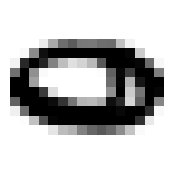

In [88]:
digitImage = np.reshape(rotated_data[3],(16,16))

plt.figure(figsize=(2, 2))
plt.imshow(digitImage,cmap='gray_r')
plt.axis('off')

Check and plot the original and rotated image. It works!

In [90]:
rotationSym = np.mean(np.abs(reshapedTrainData0or1 - rotated_data),axis=(1,2))

In [123]:
train0or1[1]

array([-1.   , -1.   , -1.   , -1.   , -1.   , -0.454,  0.879, -0.745,
       -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   , -0.716,  0.804,  1.   ,  0.42 ,
       -0.664, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -0.978,  0.713,  1.   ,  0.027,  0.408,
        0.947,  0.56 , -0.538, -1.   , -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -0.118,  1.   ,  0.665, -0.902, -0.969,
       -0.36 ,  0.805,  0.987,  0.327, -0.797, -1.   , -1.   , -1.   ,
       -1.   , -1.   , -0.935,  0.764,  1.   , -0.367, -1.   , -1.   ,
       -1.   , -0.914, -0.256,  0.833,  0.778, -0.22 , -0.992, -1.   ,
       -1.   , -1.   , -0.256,  1.   ,  0.538, -0.986, -1.   , -1.   ,
       -1.   , -1.   , -1.   , -0.837,  0.551,  1.   , -0.285, -1.   ,
       -1.   , -0.936,  0.844,  1.   , -0.263, -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   , -0.827,  0.841,  0.913, -0.948,
      

In [125]:
first_col_indices = []

# Iterate through the layers to find the index of the first column that contains a value greater than 0
for col_idx, col in enumerate(layer.T):
        if np.any(col > 0):
            first_col_indices.append(col_idx-1)
            break

last_col_indices = []

for layer in reshapedTrainData0or1:
    for col_idx, col in enumerate(np.flip(layer.T,axis=0)):
        if np.any(col > 0):
            last_col_indices.append(col_idx+1)
            break
            
first_row_indices = []

for layer in reshapedTrainData0or1:
    for row_idx, row in enumerate(layer):
        if np.any(col > 0):
            first_row_indices.append(row_idx-1)
            break

last_row_indices = []

for layer in reshapedTrainData0or1:
    for row_idx, row in enumerate(np.flip(layer,axis=0)):
        if np.any(row > 0):
            last_row_indices.append(row_idx+1)
            break

            
            
first_col_indices = np.array(first_col_indices)

last_col_indices = np.array(last_col_indices)

first_row_indices = np.array(first_row_indices)
            
last_row_indices = np.array(last_row_indices)

In [126]:
aspectRatio = (last_col_indices-first_col_indices)/(last_row_indices - first_row_indices)

In [128]:
aspectRatio.sum()

924.3000000000001

In [129]:
trainFeatures = np.column_stack((rotationSym,aspectRatio))
trainFeatures.shape

(2199, 2)

In [130]:
df = pd.DataFrame(trainFeatures,columns=['rotationSym','aspectRatio'])
df['Label'] = label0or1

df.head()

,aspectRatio,rotationSym,Label
0,2.0,0.419516,1.0
1,-1.0,0.578711,-1.0
2,1.5,0.396586,1.0
3,0.0,0.707063,-1.0
4,2.0,0.398945,1.0


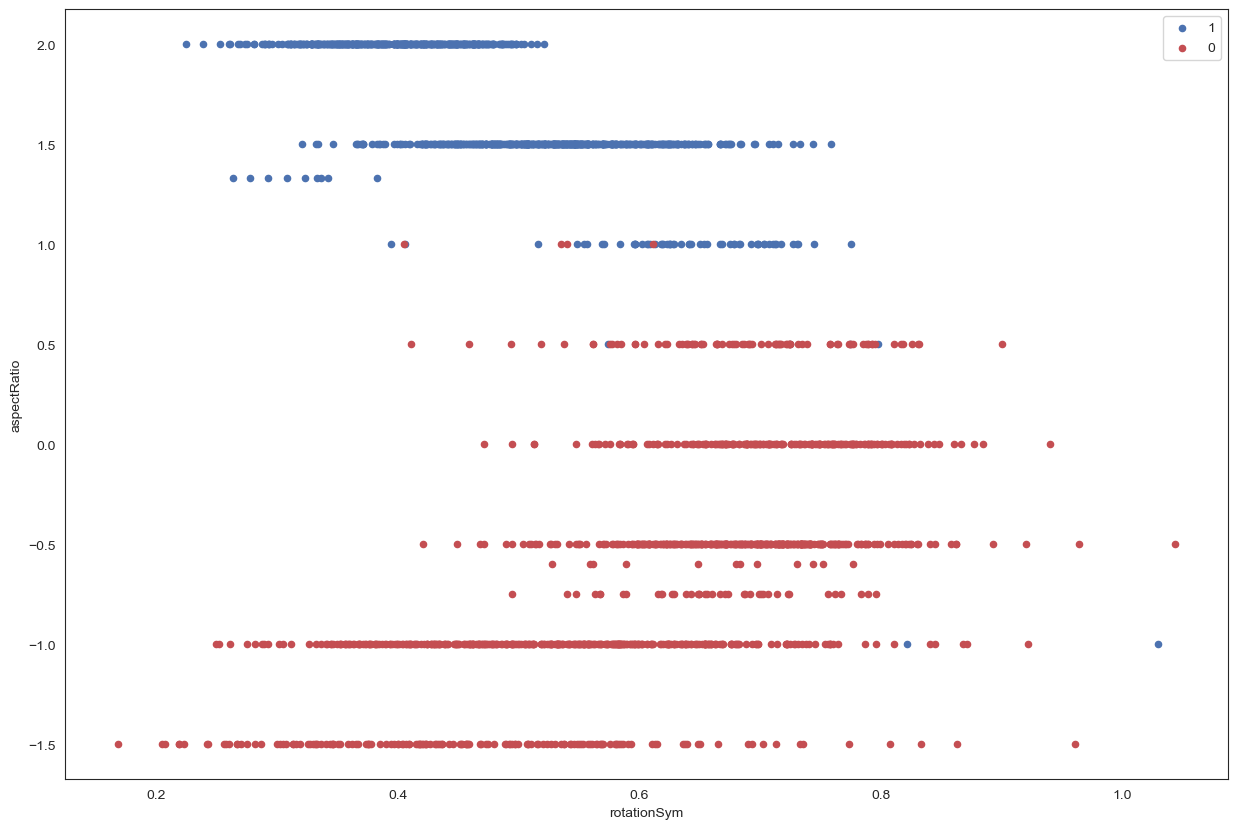

In [151]:
ax = df[df.Label == 1].plot.scatter(x='rotationSym',y='aspectRatio',label='1', color='b');
df[df.Label == -1].plot.scatter(x='rotationSym',y='aspectRatio', label='0', ax=ax, color='r');

In [142]:
X = df[['rotationSym', 'aspectRatio']].values
X, X.shape

(array([[ 0.41951563,  2.        ],
        [ 0.57871094, -1.        ],
        [ 0.39658594,  1.5       ],
        ...,
        [ 0.55324219,  1.5       ],
        [ 0.36760156, -1.        ],
        [ 0.66891406,  1.        ]]),
 (2199, 2))

In [143]:
X = np.column_stack((np.ones(X.shape[0]),X))

In [152]:
display(X)

array([[ 1.        ,  0.41951563,  2.        ],
       [ 1.        ,  0.57871094, -1.        ],
       [ 1.        ,  0.39658594,  1.5       ],
       ...,
       [ 1.        ,  0.55324219,  1.5       ],
       [ 1.        ,  0.36760156, -1.        ],
       [ 1.        ,  0.66891406,  1.        ]])

In [144]:
y = df['Label'].values
y.shape

(2199,)

In [145]:
w_lin = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w_lin.shape

(3,)

In [150]:
intercept_lin, slope_lin

(-0.30520215976763665, 1.5424324196478982)

In [146]:
slope_lin = (-w_lin[0]/w_lin[2])/(w_lin[0]/w_lin[1])
intercept_lin = - w_lin[0]/w_lin[2]

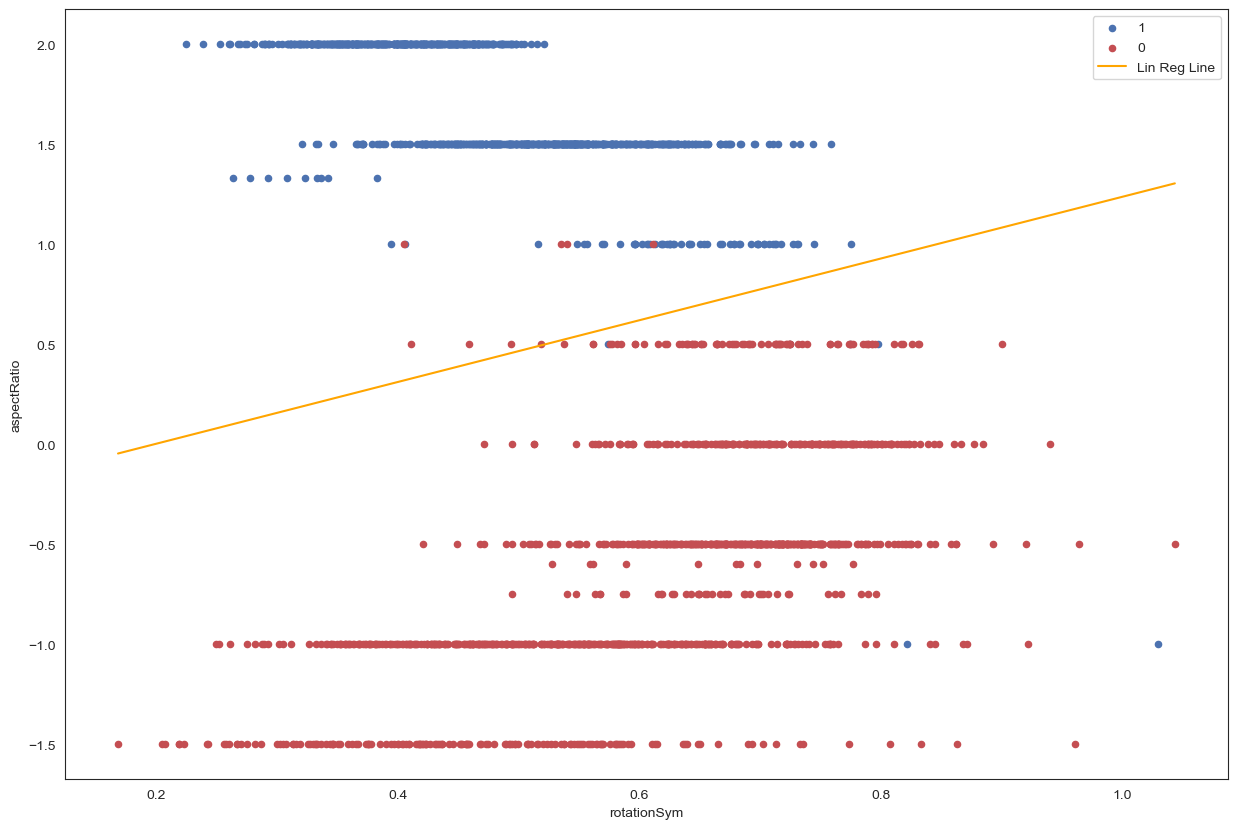

In [153]:
x = np.linspace(df.rotationSym.min(), df.rotationSym.max())

# plot 1's
ax = df[df.Label == 1].plot.scatter(x='rotationSym',y='aspectRatio',label='1', color='b');

# plot 0's
df[df.Label == -1].plot.scatter(x='rotationSym',y='aspectRatio', label='0', ax=ax, color='r');

# plot our linear regression line
plt.plot(x,slope_lin*x+intercept_lin,color='orange',label='Lin Reg Line');

plt.legend();

#### Now lets visualize those wrong points:

In [155]:
y_hat = np.where(X.dot(w_lin)>0, 1,-1)

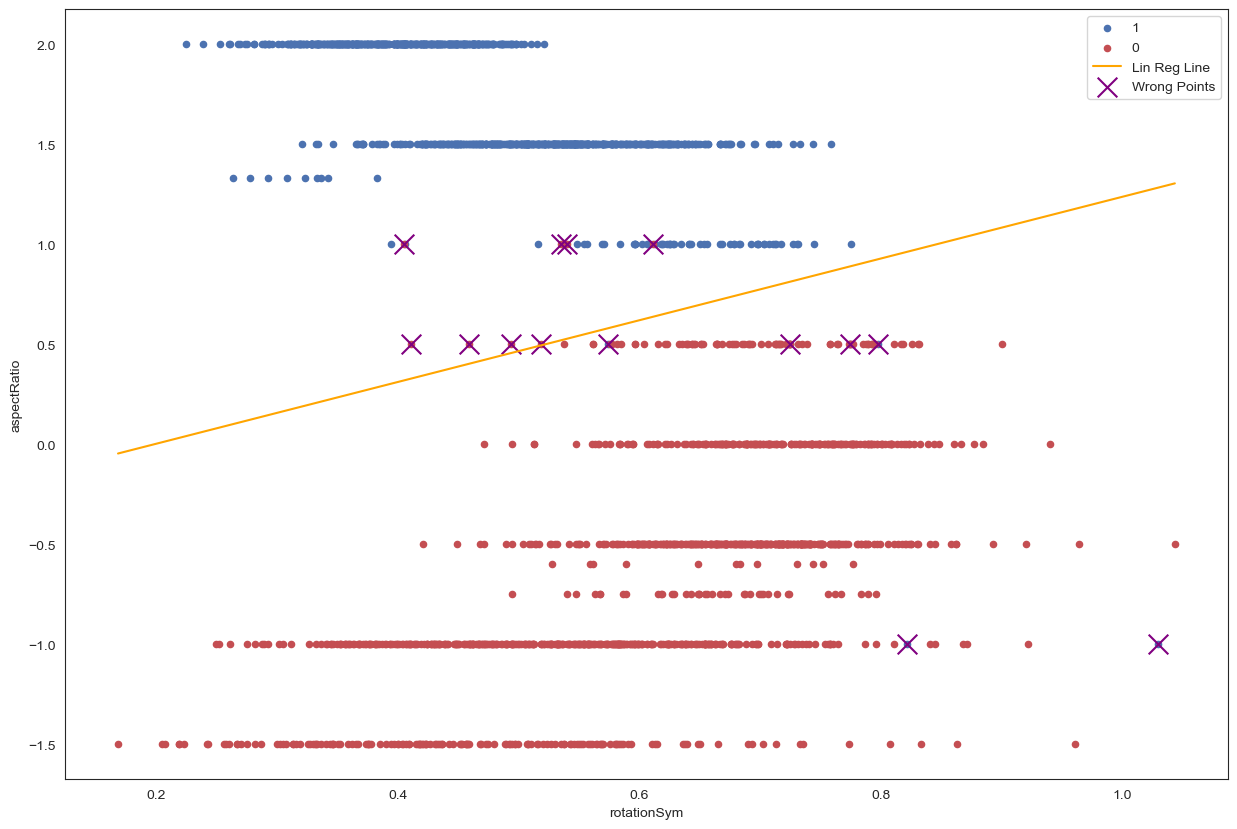

In [156]:
# plot 1's
ax = df[df.Label == 1].plot.scatter(x='rotationSym',y='aspectRatio',label='1', color='b');

# plot 5's
df[df.Label == -1].plot.scatter(x='rotationSym',y='aspectRatio', label='0', ax=ax, color='r');

# plot our linear regression line
plt.plot(x,slope_lin*x+intercept_lin,color='orange',label='Lin Reg Line');

# plot wrong points
wrongPoints = X[y_hat != y]
plt.scatter(wrongPoints[:,1], wrongPoints[:,2], color='purple',s=200,marker='x',label='Wrong Points');

plt.legend();

In [157]:
N = X.shape[0]
maxIter = 1000
eta = 0.05

# setup random weight values
w_log = np.random.rand(3)

# take a gradient descent step
for i in range(maxIter):
    
   
    # placeholder for running sum
    runningSum = 0    

    # calculate gradient at current weights
    for n in range(N):
        numerator = y[n] * X[n]
        denom =  1 + np.exp(y[n] * w_log.T.dot(X[n]))
        runningSum += numerator/denom

    eInGrad = -runningSum/N

    # take a step in the negative gradient direction
    w_log_new = w_log - eta * eInGrad
    
    # store for the next round
    w_log = w_log_new
    
    
w_0, w_1,w_2 = w_log
w_0, w_1,w_2 

slope_log = -w_1 / w_2
intercept_log = -w_0 / w_2

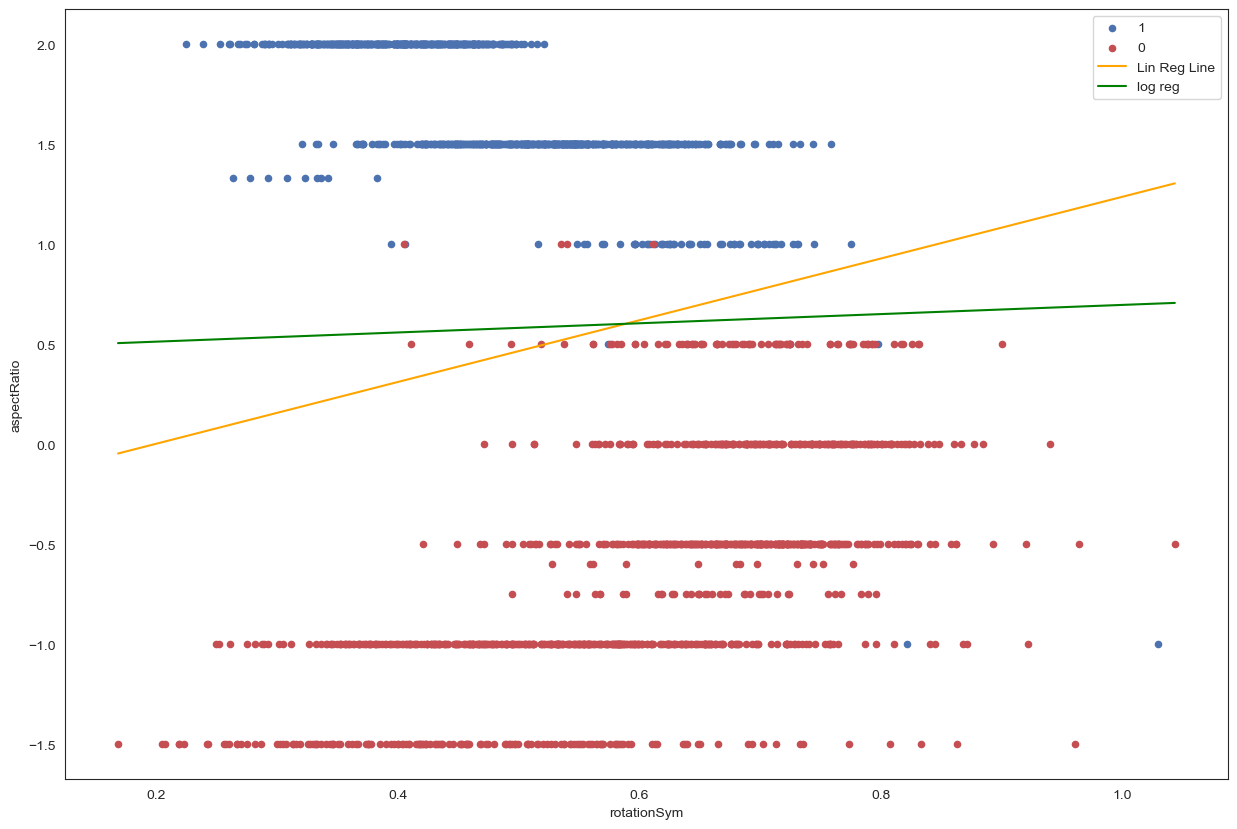

In [158]:
x = np.linspace(df.rotationSym.min(), df.rotationSym.max())

# plot 1's
ax = df[df.Label == 1].plot.scatter(x='rotationSym',y='aspectRatio',label='1', color='b');

# plot 0's
df[df.Label == -1].plot.scatter(x='rotationSym',y='aspectRatio', label='0', ax=ax, color='r');

# plot our linear regression line
plt.plot(x,slope_lin*x+intercept_lin,color='orange',label='Lin Reg Line')

# plot our logistic regression line
plt.plot(x,slope_log*x+intercept_log, color='green', label='log reg');

plt.legend();

**Answer:** In summary, based on the plot above, it's evident that logistic regression aligns closely with our intuitive understanding. Additionally, the two features I engineered contribute differently to the model. Among them, Aspect Ratio is clearly the most significant contributor to the classification.